<a href="https://colab.research.google.com/github/adhang/lendingclub-loan-credit-risk/blob/main/LendingClub_Loan_Credit_Risk_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LendingClub - Loan Credit Prediction

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

I have already written my EDA in another notebook. Therefore, I won't cover it here.

# Libraries

## Installing Libraries

In [1]:
# !pip install inflection
# !pip install dython

# !pip install datawig
# !pip install missingno

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

# !pip install optuna
# !pip install shap

# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade scipy
# !pip install --upgrade scikit-learn
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

## Importing Libraries

In [2]:
# data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# statistics
from scipy import stats

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case
import inflection

# missing values
import missingno as msno

# missing values imputation
import datawig
from sklearn.impute import SimpleImputer

# association between attributes
from dython.nominal import associations

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# oversampling
from imblearn.over_sampling import SMOTE

# model
import catboost as cb
from catboost import CatBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgbm
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# hyperparameter tuning
import optuna

# Dataset Overview

## Reading Dataset

In [3]:
path = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/dataset/loan_data_2007_2014.csv'

data = pd.read_csv(path, dtype={'desc':str})
data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0     5861.071   
1        4.0                   f        0.0            0.0     1008.710   
2       10.0                   f        0.0            0.0     3003.654   
3       37.0                   f        0.0            0.0    12226.302   
4       38.0                   f      766.9          766.9     3242.170   

   total_pymnt_

The first column (`Unnamed: 0`) is just like an index, so I'll drop it.

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0     5861.071   
1        4.0                   f        0.0            0.0     1008.710   
2       10.0                   f        0.0            0.0     3003.654   
3       37.0                   f        0.0            0.0    12226.302   
4       38.0                   f      766.9          766.9     3242.170   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.0

## Duplicated Values

In [5]:
data.duplicated().sum()

0

There's no duplicated value, good start.

## Data Types

### Numeric

In [6]:
data.select_dtypes(include=np.number).head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  1077501    1296599       5000         5000           4975.0     10.65   
1  1077430    1314167       2500         2500           2500.0     15.27   
2  1077175    1313524       2400         2400           2400.0     15.96   
3  1076863    1277178      10000        10000          10000.0     13.49   
4  1075358    1311748       3000         3000           3000.0     12.69   

   installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
0       162.87     24000.0  27.65          0.0             1.0   
1        59.83     30000.0   1.00          0.0             5.0   
2        84.33     12252.0   8.72          0.0             2.0   
3       339.31     49200.0  20.00          0.0             1.0   
4        67.79     80000.0  17.94          0.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0      13648        83.7        9.0        0.0            0.0     5861.071   
1       1687         9.4        4.0        0.0            0.0     1008.710   
2       2956        98.5       10.0        0.0            0.0     3003.654   
3       5598        21.0       37.0        0.0            0.0    12226.302   
4      27783        53.9       38.0      766.9          766.9     3242.170   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   
3        0.00                     0.00           357.48   
4        0.00                     0.00            67.79   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   
2                         0.0                          NaN            1   
3                         0.0                          NaN            1   
4                         0.0                          NaN            1   

   annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  \
0               NaN        NaN                        NaN             0.0   
1               NaN        NaN                        NaN             0.0   
2               NaN        NaN                        NaN             0.0   
3               NaN        NaN                        NaN             0.0   
4               NaN        NaN                        NaN             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0           NaN          NaN          NaN         NaN          NaN   
1           NaN          NaN          NaN         NaN          NaN   
2           NaN          NaN          NaN         NaN          NaN   
3           NaN          NaN          NaN         NaN          NaN   
4           NaN          NaN          NaN         NaN          NaN   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
0          NaN                 NaN         

### Categorical

In [7]:
data.select_dtypes(exclude=np.number).head()

term grade sub_grade                 emp_title emp_length  \
0   36 months     B        B2                       NaN  10+ years   
1   60 months     C        C4                     Ryder   < 1 year   
2   36 months     C        C5                       NaN  10+ years   
3   36 months     C        C1       AIR RESOURCES BOARD  10+ years   
4   60 months     B        B5  University Medical Group     1 year   

  home_ownership verification_status issue_d  loan_status pymnt_plan  \
0           RENT            Verified  Dec-11   Fully Paid          n   
1           RENT     Source Verified  Dec-11  Charged Off          n   
2           RENT        Not Verified  Dec-11   Fully Paid          n   
3           RENT     Source Verified  Dec-11   Fully Paid          n   
4           RENT     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state earliest_cr_line  \
0              Computer    860xx         AZ           Jan-85   
1                  bike    309xx         GA           Apr-99   
2  real estate business    606xx         IL           Nov-01   
3              personel    917xx         CA           Feb-96   
4              Personal    972xx         OR           Jan-96   

  initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d  \
0                   f       Jan-15          NaN             Jan-16   
1                   f       Apr-13          NaN             Sep-13   
2                   f       Jun-14          NaN             Jan-16   
3                   f       Jan-15          NaN             Jan-15   
4                   f       Jan-16       Feb-16             Jan-16   

  application_type  
0       INDIVIDUAL  
1       INDIVIDUAL  
2       INDIVIDUAL  
3       INDIVIDUAL  
4       INDIVIDUAL

## Missing Values

### Tabular

In [8]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

### Bar Plot

<AxesSubplot:>

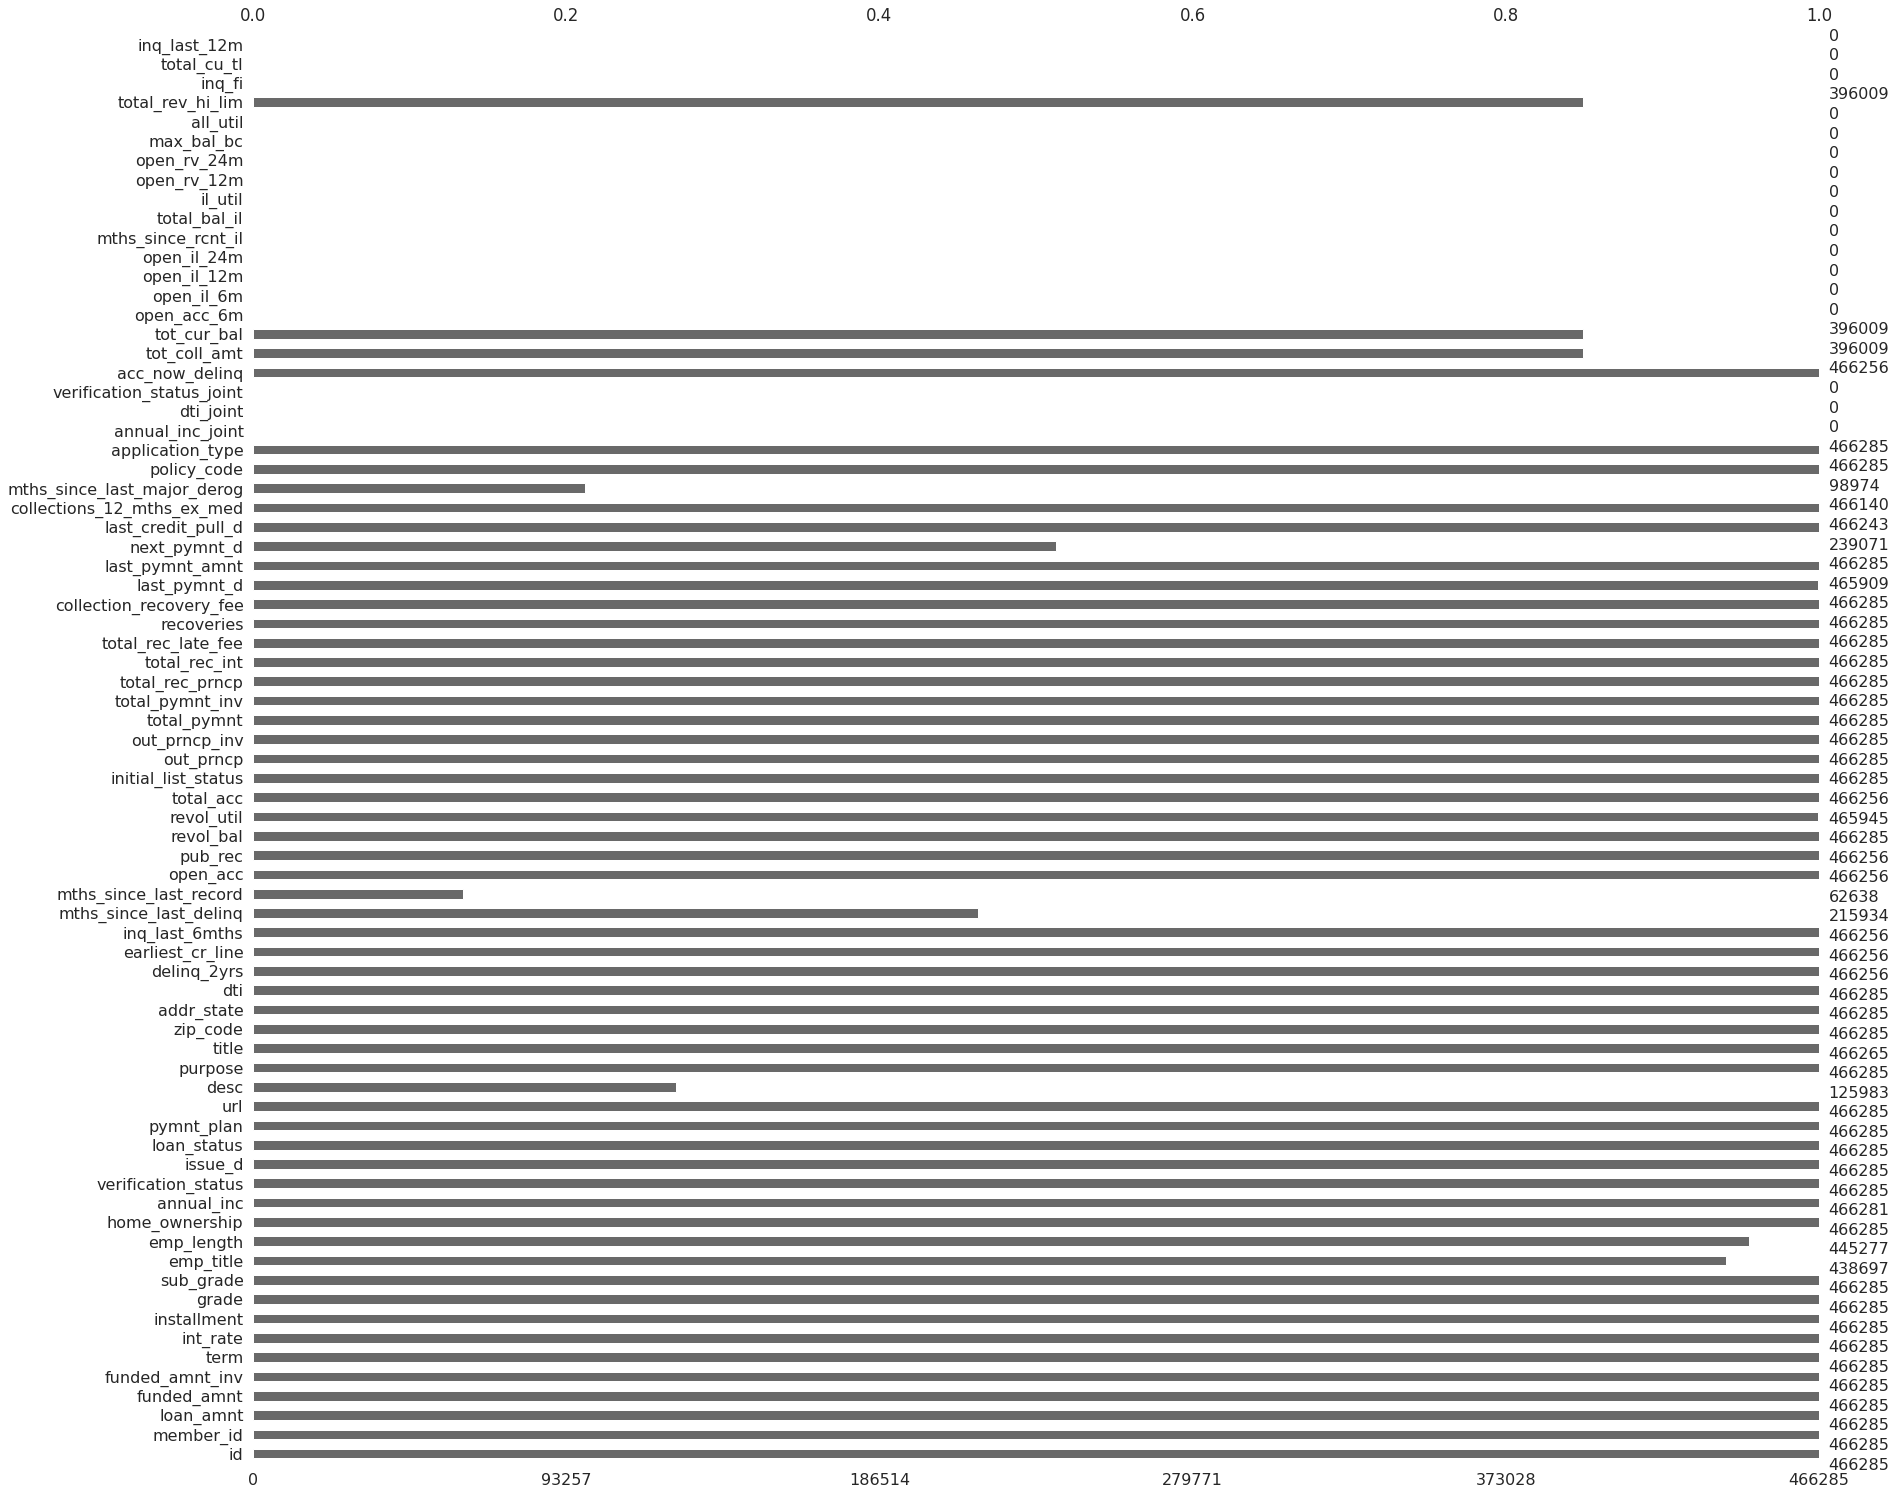

In [9]:
msno.bar(data)

As we can see, there are some columns that have pretty much missing values. Moreover, some columns contain only missing values.

### Correlation Heatmap

The `missingno` correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
<br><br>

Nullity correlation ranges from `-1` (if one variable appears the other definitely does not) to `0` (variables appearing or not appearing have no effect on one another) to `1` (if one variable appears the other definitely also does).
<br><br>

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.
<br><br>

Source: [missingno documentation](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

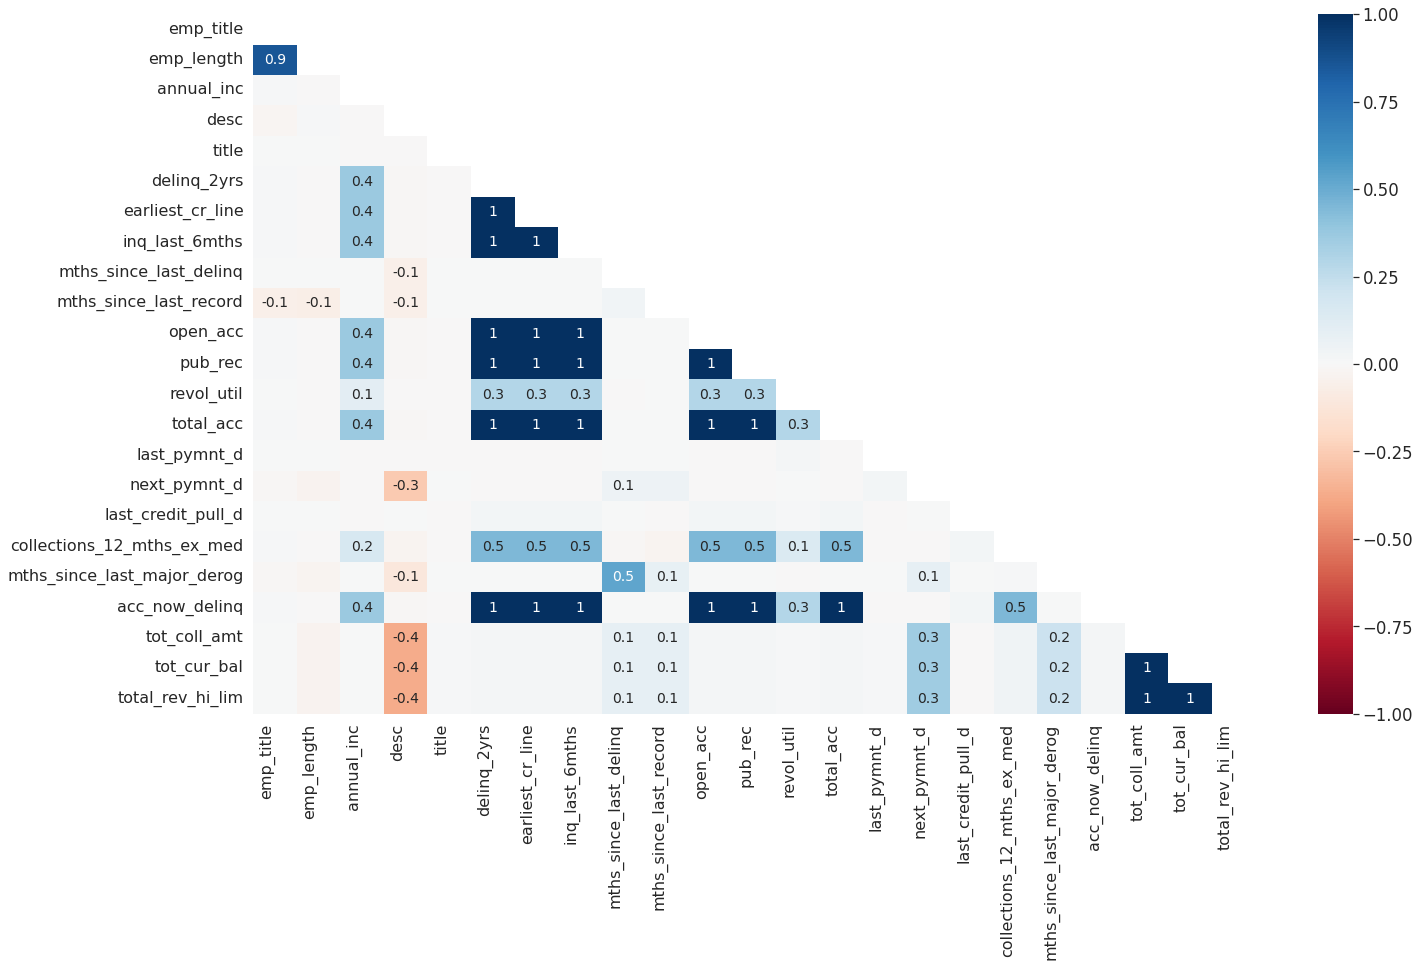

In [10]:
msno.heatmap(data, label_rotation=90)

- In this dataset, we can see that there are many columns that have perfect correlation (correlation = 1). For example, it seems that if the `tot_rev_hi_lim` is null, then the `total_coll_amt` and `tot_cur_bal` are null too.
- Employment title (`emp_title`) and employment lenght (`emp_length`) have high correlation, but not perfect. We can recheck those columns.

### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.
<br><br>

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.
<br><br>

Source: [missingno documentation](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

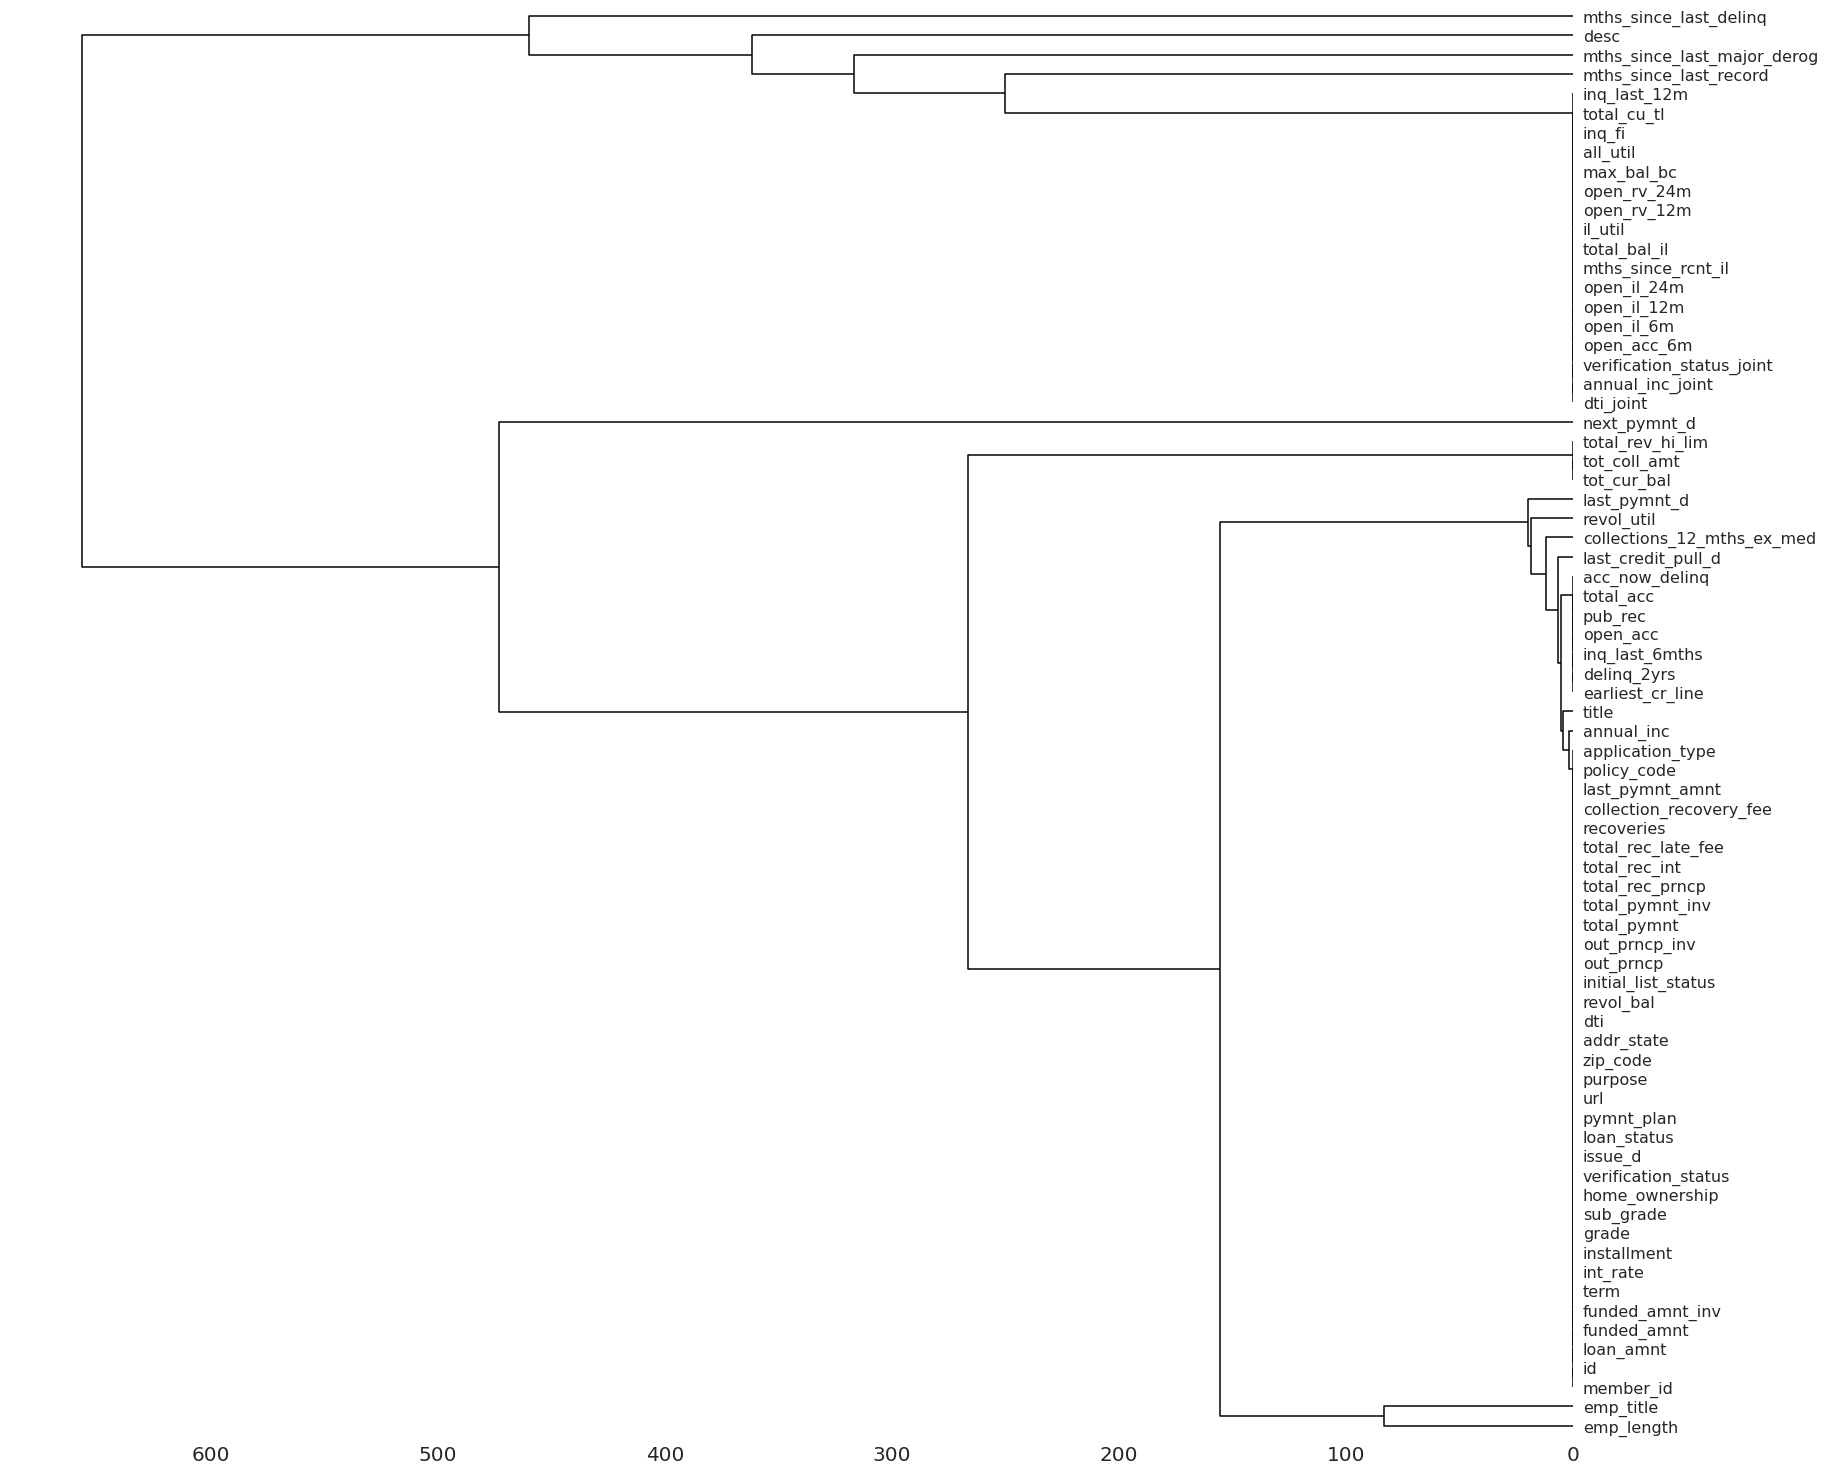

In [11]:
msno.dendrogram(data)

### Missing Values Location

<AxesSubplot:>

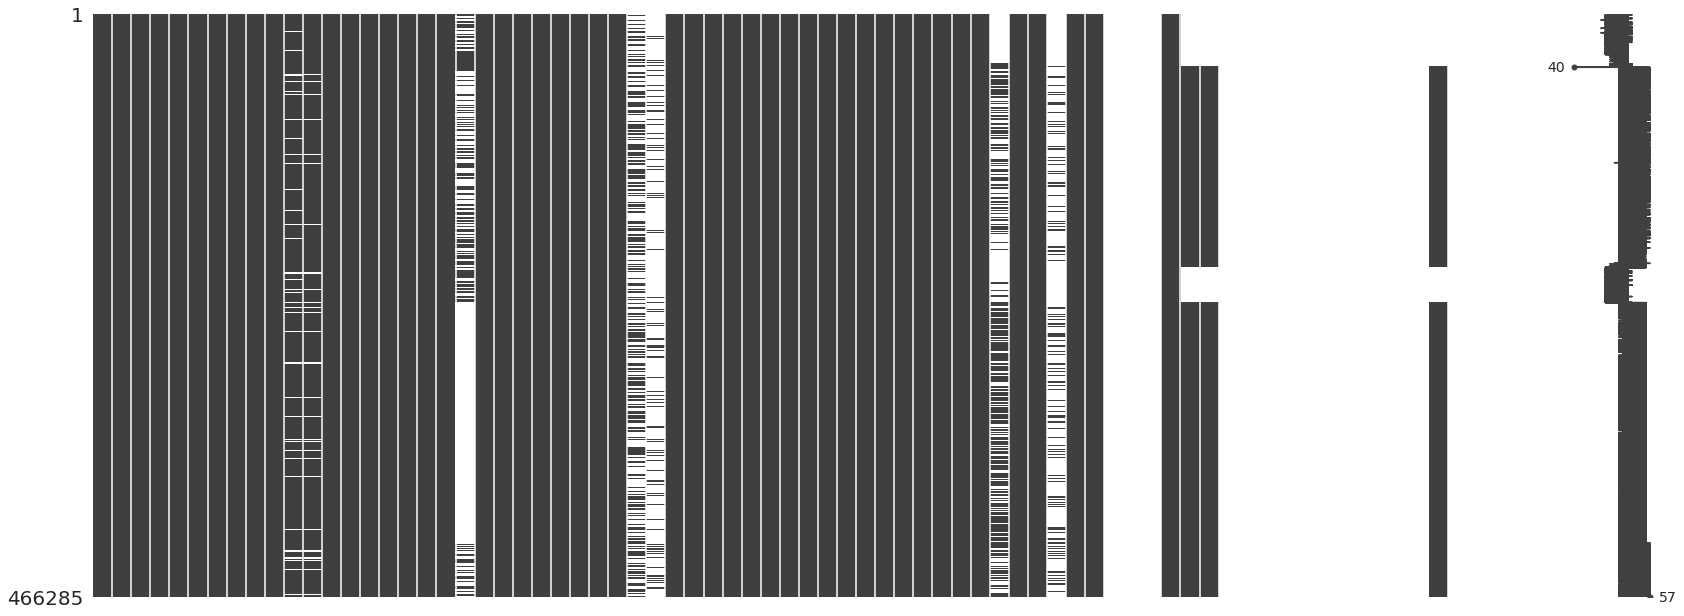

In [12]:
msno.matrix(data)

## Dropping Columns with Many Missing Values

Up to now, I still don't know the right 'rule' about the tolerance of missing values. If you have any clue, please tell me.
<br><br>
So, for this project, I will just drop some columns with missing values of more than 40%. 

### Dropping Columns

In [13]:
data.shape

(466285, 74)

In [14]:
mask = data_null['percentage_null'] > 40
column_null = data_null.loc[mask].index.tolist()

data.drop(columns=column_null, inplace=True)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0          0.0           Jan-85             1.0       3.0      0.0      13648   
1          0.0           Apr-99             5.0       3.0      0.0       1687   
2          0.0           Nov-01             2.0       2.0      0.0       2956   
3          0.0           Feb-96             1.0      10.0      0.0       5598   
4          0.0           Jan-96             0.0      15.0      0.0      27783   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        83.7        9.0                   f        0.0            0.0   
1         9.4        4.0                   f        0.0            0.0   
2        98.5       10.0                   f        0.0            0.0   
3        21.0       37.0                   f        0.0            0.0   
4        53.9       38.0                   f      766.9          766.9   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0     5861.071          5831.78          5000.00         861.07   
1     1008.710          1008.71           456.46         435.17   
2     3003.654          3003.65          2400.00         603.65   
3    12226.302         12226.30         10000.00        2209.33   
4     3242.170          3242.17          2233.10        1009.07   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       Jan-16   

   

### Update Missing Value List

In [15]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

In [16]:
data.shape

(466285, 52)

I have deleted 22 columns. Now, the highest column that has missing values is only 15%.

In [17]:
mask = data_null['total_null'] != 0
column_null = data_null[mask].index.tolist()
column_null

['emp_title',
 'emp_length',
 'annual_inc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

# Data Preprocessing

## Visualization Function

### Stacked Bar Plot

In [18]:
def stacked_bar_plot(data, x, y, orient='horizontal', 
                     ax=None, show=True, annot=True, sortby='values', 
                     title=None, index_type=None, color=['#FC4F30', '#008FD5']):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create specific color
  if color == 'single':
    color = ['#FC4F30', '#C2C2C2']

  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['Bad', 'Good'], axis=1)
  if index_type != None:
    crosstab.index = crosstab.index.astype(index_type)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    if sortby == 'index':
      crosstab = crosstab.sort_index(ascending=True)
    else:
      crosstab = crosstab.sort_values('Bad', ascending=False)
    crosstab.plot(kind='bar', stacked=True, color=color, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(x=i,
                    y=(y_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    if sortby == 'index':
      crosstab = crosstab.sort_index(ascending=False)
    else:
      crosstab = crosstab.sort_values('Bad', ascending=True)
    crosstab.plot(kind='barh', stacked=True, color=color, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(y=i,
                    x=(x_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  if title == None:
    x_titleize = inflection.titleize(x)
    ax.set_title(f'Loan Credit Risk Probability by {x_titleize}')
  else:
    ax.set_title(title)
    
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### Rank Bar Plot

In [19]:
def rank_bar_plot(data, x, y, threshold_top=5, threshold_bot=None, 
                  custom_label=False, ax=None, show=True):
  # custom palette top associations
  if threshold_bot == None:
    threshold_bot = data.size - threshold_top - 1

  palette = []
  for i in range(0, len(data)):
    if i < threshold_top:
      palette.append('#008FD5') # blue
    elif i > threshold_bot:
      palette.append('#FC4F30') # red
    else:
      palette.append('silver')

  if ax == None:
    _, ax = plt.subplots(figsize=(8,16))

  sns.barplot(x=x, y=y, ax=ax, palette=palette, saturation=1)

  if custom_label == True:
    # custom y label color
    for i, label in enumerate(ax.yaxis.get_ticklabels()):
      if (i >= threshold_top) and (i <= threshold_bot):
        label.set_color('silver')
  
    # custom bar label visibility
    for con in ax.containers:
      # labels = [val for val in con.datavalues]
      labels = con.datavalues
      labels_len = len(labels)

      # masking the top 3 an bottom 3
      np.put(labels, np.arange(3,labels_len-3), [-1])
      
      # hide the labels for non-top 3 and non-bottom 3
      labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

      ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')
  else:
    ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

  ax.set_xticklabels([])
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### KDE Probability Plot

In [20]:
def kde_proba_plot(data, x, hue, ax=None, show=True, xlabel=None, alpha=0.9,
                   xticks_step=100, palette=['#008FD5', '#FC4F30']):
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  if xlabel == None:
    xlabel = inflection.titleize(x)

  if palette == 'single':
    palette = ['#C2C2C2', '#FC4F30']

  ax.grid(False, axis='x')

  sns.kdeplot(data=data, x=x, hue=hue, multiple='fill',
              linewidth=3, ax=ax, alpha=alpha, palette=palette)
  sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

  ax.set_xticks(np.arange(0, data[x].max(), xticks_step))
  ax.set_xlim(data[x].min(), data[x].max())
  ax.set_xlabel(xlabel)

  ax.set_yticks(np.linspace(0,1,5))
  ax.set_ylabel('probability')

  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### Heatmap Correaltion

In [21]:
def heatmap_corr_plot(data, mask=None, annot=None, cbar=False,
                      ax=None, show=True):
  if mask:
    mask = np.triu(np.ones_like(data, dtype=bool))

  if ax == None:
    _, ax = plt.subplots(figsize=(40,40))

  sns.heatmap(data, vmin=-1, vmax=1, cbar=False,
              cmap='coolwarm', linewidth=1, mask=mask,
              square=True, annot=annot, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

  if show:
    plt.show()

### Save Figure

In [22]:
def save_fig(fname, format='svg'):
  drive = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/output/'
  # fname = 'issue-date-probability.svg'
  path = drive + fname
  plt.savefig(path, format=format, bbox_inches='tight', facecolor='white')

## Target Variable

### Identifying Target Variable

This dataset information doesn't give an explicit information about its target variable. After reading all of the provided attribute information, I end up in a conclusion: The target variable is the loan status.

In [23]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [24]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

As shown above, the loan status has many categories.
<br><br>

Based on [LendingClub](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-), the definition of each status is:
- `Fully Paid`: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- `Current`: Loan is up to date on all outstanding payments.
- `In Grace Period`: Loan is past due but within the 15-day grace period.
- `Late (16-30)`: Loan has not been current for 16 to 30 days.
- `Late (31-120)`: Loan has not been current for 31 to 120 days.
- `Default`: Loan has not been current for 121 days or more.
- `Charged Off`: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.
<br><br>

Based on those descriptions, I will create a new feature whether the loan status is `Good` or `Bad`. 
<br><br>

The `Good` status is when the loan status is either `Current` or `Fully Paid`, otherwise the status is `Bad`.
<br><br>

I won't include the `Does not meet the credit policy. Status:Fully Paid` as a `Good` status, because it doesn't meet the credit policy.

In [25]:
good_status = ['Fully Paid', 'Current']

data['target'] = data['loan_status'].apply(lambda x: 'Good' if x in good_status else 'Bad')

In [26]:
data.drop(columns='loan_status', inplace=True)

### Target Distribution

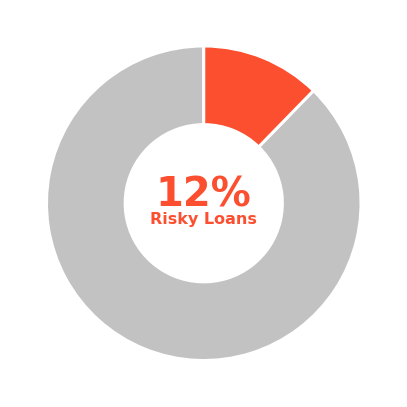

In [27]:
pie_data = data['target'].value_counts(normalize=True).values * 100
pie_label = data['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges = ax.pie(pie_data, startangle=90,
                wedgeprops={'width':0.5, 'linewidth':3},
                colors=['#C2C2C2', '#FC4F30'])

text_1 = f'{pie_data[1]:.0f}%'
text_2 = 'Risky Loans'

ax.text(0, 0.05, text_1, fontsize=40, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')
ax.text(0, -0.1, text_2, fontsize=16, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')

plt.tight_layout()

plt.show()

As we can see, 12% of borrowers have bad loan status. Technically speaking, this dataset is an imbalanced dataset.

## Dropping Columns

### Single Variation

I will drop the `application_type` since it only has a single variation

In [28]:
data.drop(columns=['application_type'], inplace=True)

### High Cardinality

I will drop some categorical columns that have too many categories and hard to find its pattern. From the previous section, we know that `title`, `emp_title`, and `url` have a high cardinality. So, I will drop it.

In [29]:
data.drop(columns=['title', 'emp_title', 'url'], inplace=True)

### Zip Code

In [30]:
data[['zip_code', 'addr_state']].sort_values('zip_code').head(10)

zip_code addr_state
29984     007xx         NJ
342425    007xx         FL
285814    007xx         PA
325695    008xx         VA
231293    010xx         MA
9236      010xx         MA
43706     010xx         MA
113322    010xx         MA
113272    010xx         MA
9270      010xx         MA

As we can see, a same zip code has different address state. So, I think zip code (in this dataset) doesn't give an exact information. So, I will drop it.

In [31]:
data.drop(columns=['zip_code'], inplace=True)

### ID Number

I think, the ID number (`id` and `member_id`) doesn't give any information about the borrowers. I will drop it.

In [32]:
data.drop(columns=['id', 'member_id'], inplace=True)

### Very Imbalanced

There are some categorical features that have imbalanced distribution. So, I will drop it.

In [33]:
data.drop(columns=['pymnt_plan', 'addr_state'], inplace=True)

### Update Column List

In [34]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

data[column_categorical].nunique().sort_values()

term                     2
initial_list_status      2
target                   2
verification_status      3
home_ownership           6
grade                    7
emp_length              11
purpose                 14
sub_grade               35
issue_d                 91
last_pymnt_d            98
last_credit_pull_d     103
earliest_cr_line       664
dtype: int64

As seen above, the last 4 columns that have the highest variation are date columns.

## Date Features

I do this project on a limited time. So, this is a simple approach to handle the date columns. I will just use the 'year' instead of 'month-year' format. Fortunately, the date columns are in a fixed format (and clean!). I just need to convert to datetime format.

### Extract Year

In [35]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in column_date:
  # split to individual columns
  tmp = data[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  # data_viz[col] = tmp['year']

  print(np.sort(tmp['year'].unique()))

[ 7  8  9 10 11 12 13 14]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 44. 46. 48. 49. 50. 51.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. nan]


I have to add the year prefix (its century) to avoid misleading information.

In [36]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
column_date_split = list()

for col in column_date:
  # define the column names
  col_year = f'{col}_year'

  column_date_split.append(col_year)

  # split to individual columns
  tmp = data[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # add year prefix (century), whether it's 19 or 20
  tmp['year'] = tmp['year'].apply(lambda x: np.nan if pd.isna(x) else 
                                  (f'20{x}' if int(x) <= 16 else f'19{x}'))

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  data[col_year] = tmp['year']
  
  print(np.sort(tmp['year'].unique()))

[2007 2008 2009 2010 2011 2012 2013 2014]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[1944. 1946. 1948. 1949. 1950. 1951. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.   nan]


In [37]:
data.loc[:5, column_date]

issue_d last_pymnt_d last_credit_pull_d earliest_cr_line
0  Dec-11       Jan-15             Jan-16           Jan-85
1  Dec-11       Apr-13             Sep-13           Apr-99
2  Dec-11       Jun-14             Jan-16           Nov-01
3  Dec-11       Jan-15             Jan-15           Feb-96
4  Dec-11       Jan-16             Jan-16           Jan-96
5  Dec-11       Jan-15             Sep-15           Nov-04

In [38]:
data.loc[:5, column_date_split]

issue_d_year  last_pymnt_d_year  last_credit_pull_d_year  \
0          2011             2015.0                   2016.0   
1          2011             2013.0                   2013.0   
2          2011             2014.0                   2016.0   
3          2011             2015.0                   2015.0   
4          2011             2016.0                   2016.0   
5          2011             2015.0                   2015.0   

   earliest_cr_line_year  
0                 1985.0  
1                 1999.0  
2                 2001.0  
3                 1996.0  
4                 1996.0  
5                 2004.0

### Drop Columns

In [39]:
data.drop(columns=column_date, inplace=True)

In [40]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

data[column_categorical].nunique().sort_values()

term                    2
initial_list_status     2
target                  2
verification_status     3
home_ownership          6
grade                   7
emp_length             11
purpose                14
sub_grade              35
dtype: int64

## Feature Associations

I will calculate the associations between each features to the target variable. Then, I will drop some features that have very small associations to the target variable.
<br><br>
I will mark the independent features that are highly correlated to each other, or we can say it as multicollinearity.

In [41]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

### Associations to Target

Associations can be used to describe the relationship between features.

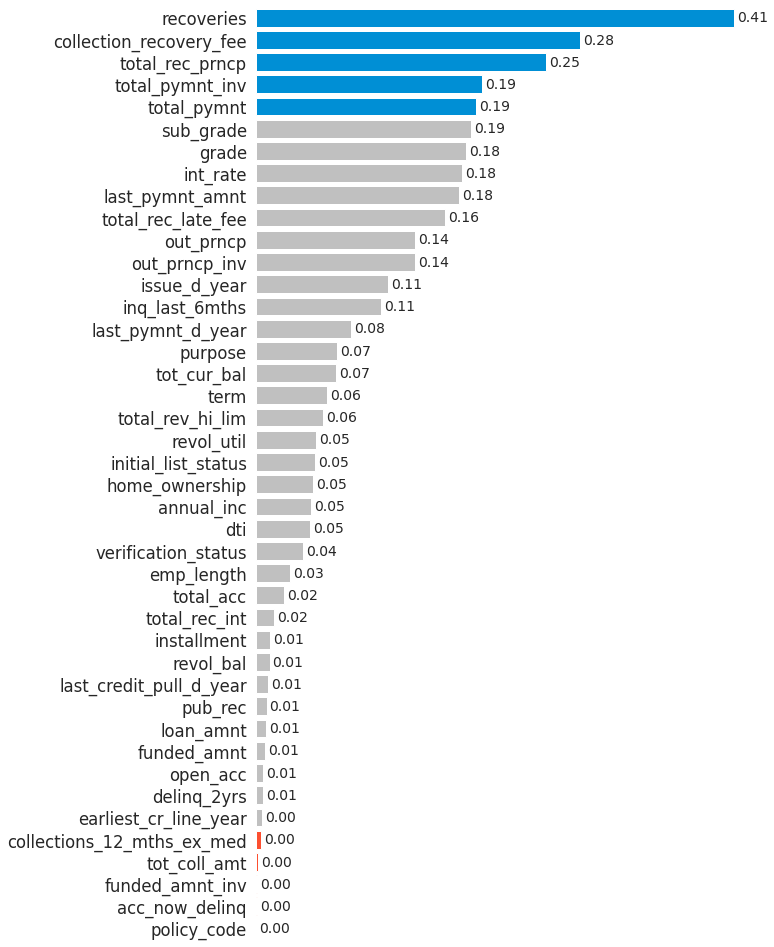

In [42]:
_, ax = plt.subplots(figsize=(8,16))

rank_bar_plot(data=corr_target, x=corr_target.values, y=corr_target.index, ax=ax)

### Drop Low Associations

In [43]:
column_low_assc = ['earliest_cr_line_year', 'collections_12_mths_ex_med',
                   'tot_coll_amt', 'funded_amnt_inv', 
                   'acc_now_delinq', 'policy_code']

data.drop(columns=column_low_assc, inplace=True)

### Multicollinearity

In [44]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

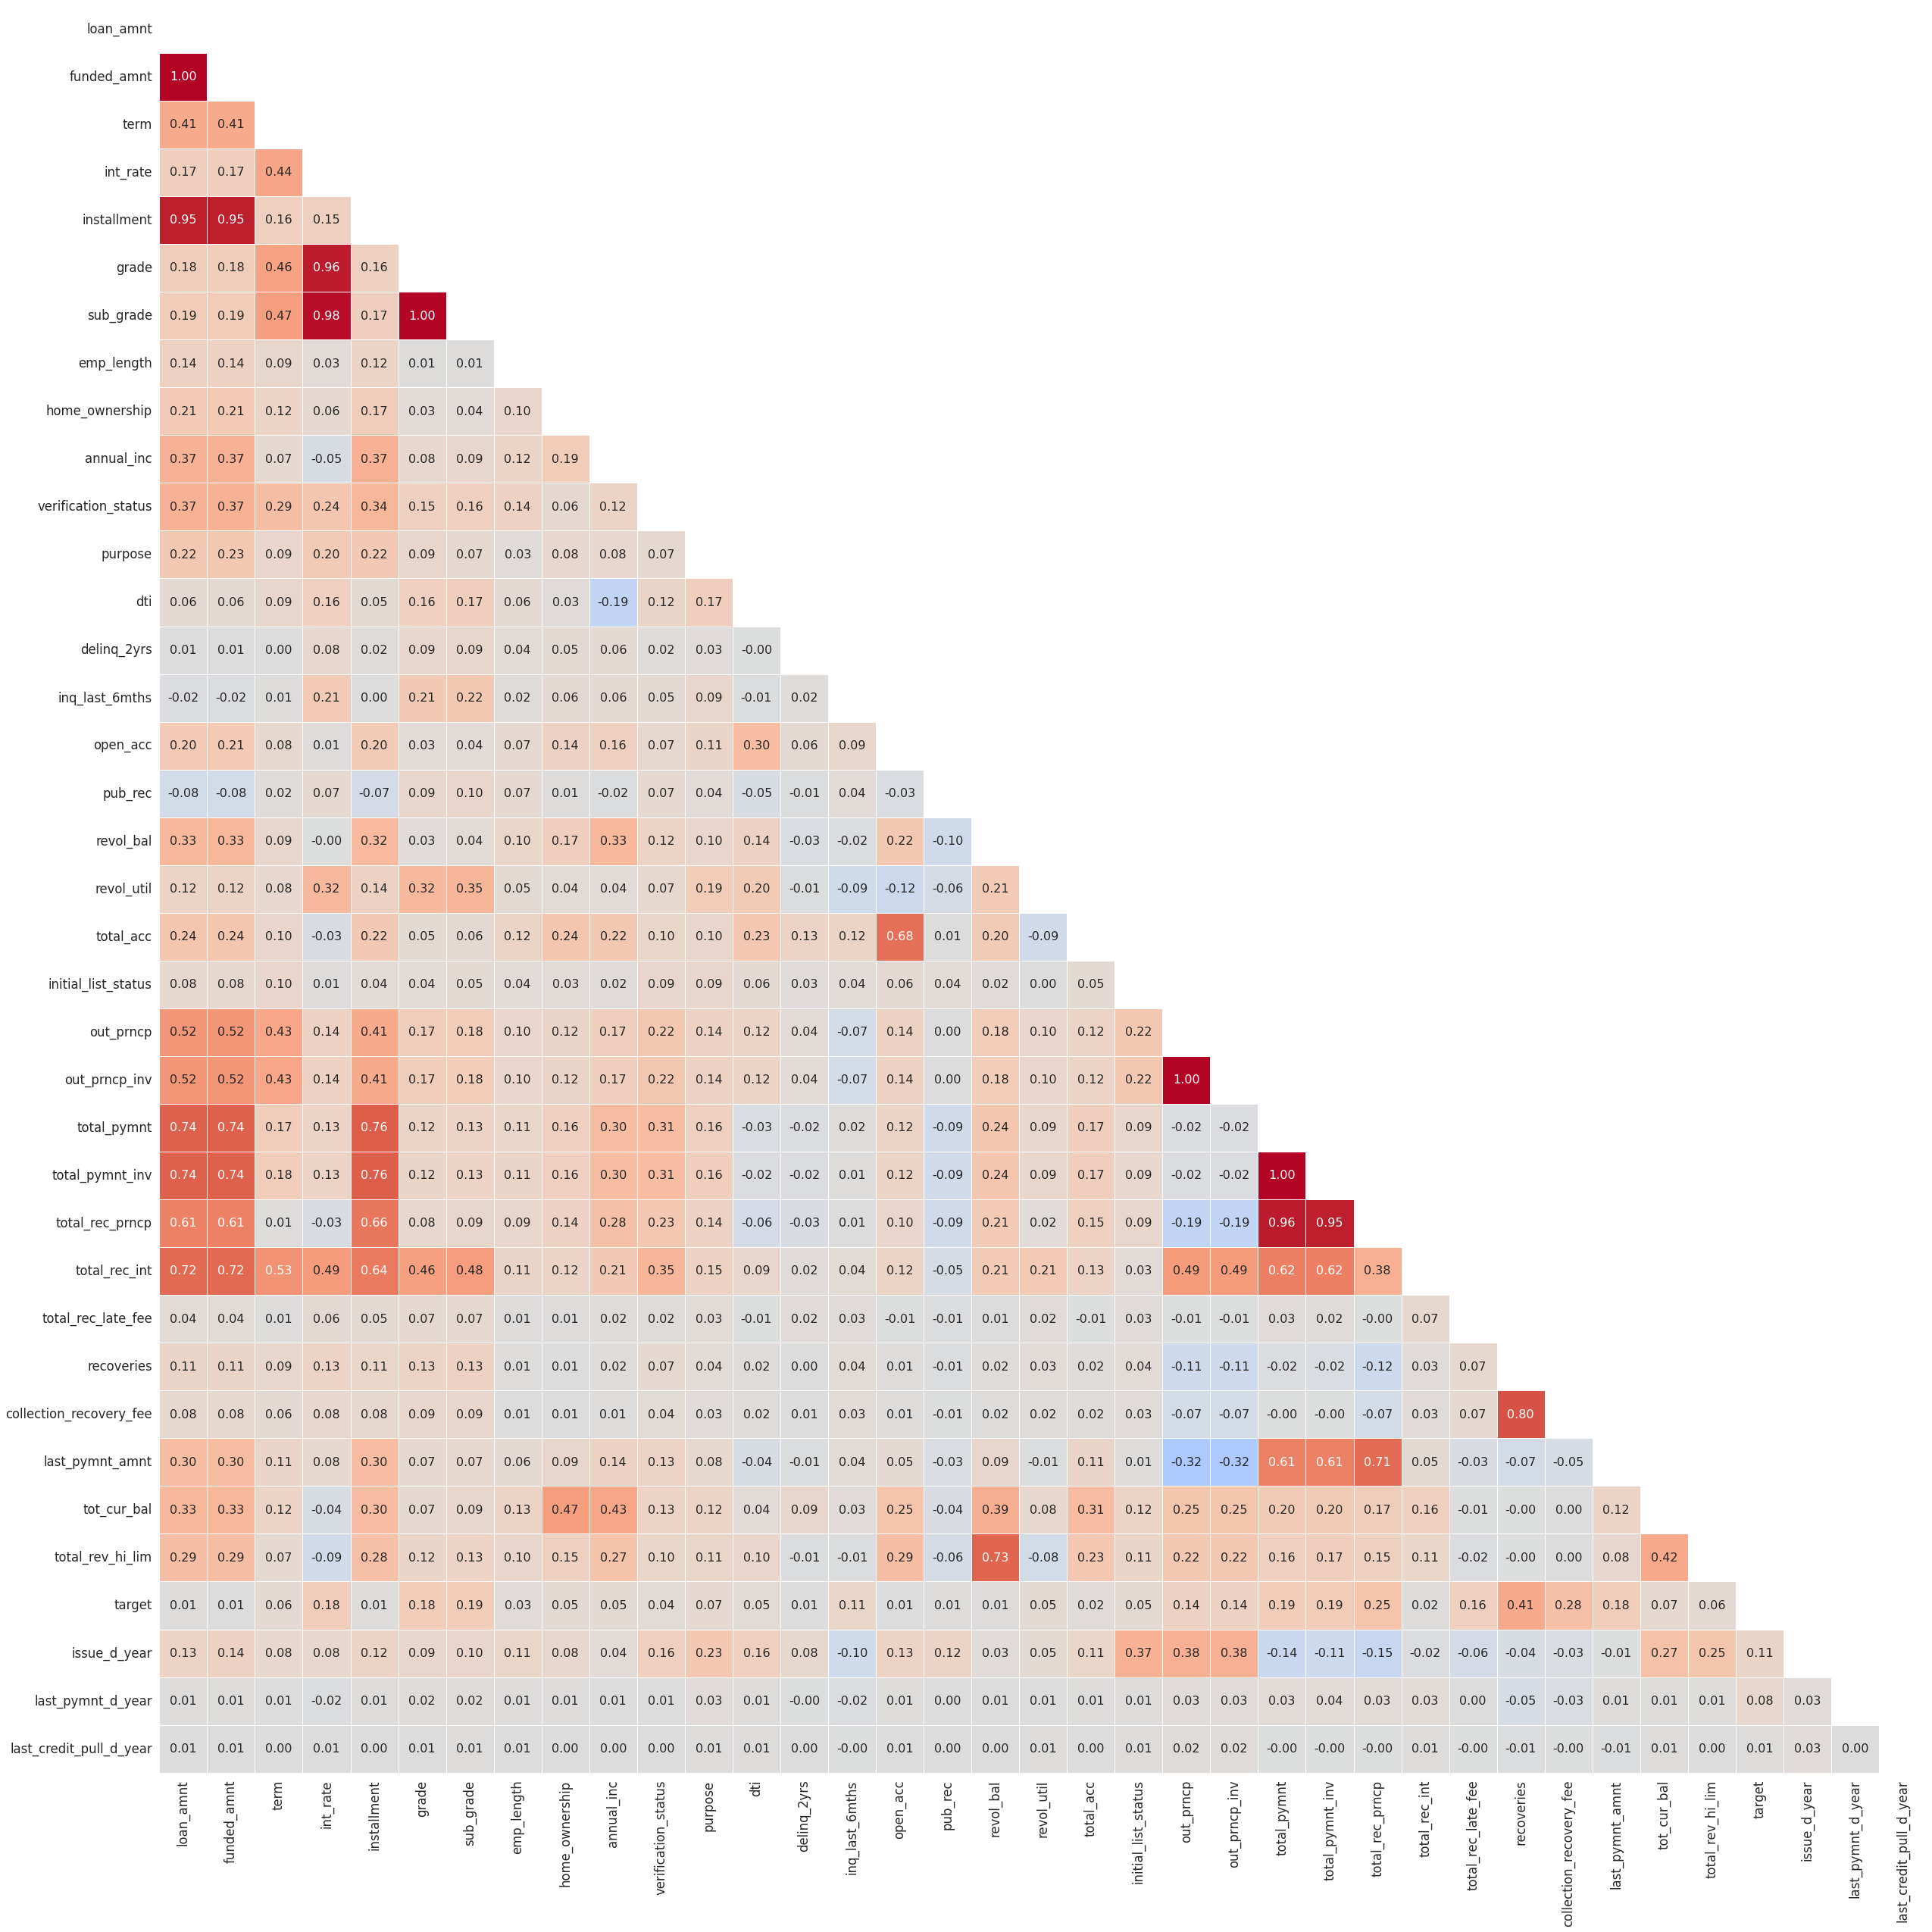

In [45]:
_, ax = plt.subplots(figsize=(40,40))

heatmap_corr_plot(corr_all, mask=True, annot=True, ax=ax)

At glance, there are some multicollinearity. To check multicollinearity, we can use Variance Inflation Factor (VIF). But, I will not do it now.
<br><br>
There are two simple and commonly used ways to correct multicollinearity, as listed below:
- The first one is to remove one (or more) of the highly correlated variables. Since the information provided by the variables is redundant, the coefficient of determination will not be greatly impaired by the removal.
- The second method is to use principal components analysis (PCA) or partial least square regression (PLS) instead of OLS regression. PLS regression can reduce the variables to a smaller set with no correlation among them. In PCA, new uncorrelated variables are created. It minimizes information loss and improves the predictability of a model.
<br>

[Source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/)

### Handling Multicollinearity

For now, I will just drop some features (independent variables) that are highly correlated to each other. My strategy is, to find the features that have multicollinearity, then drop the features that have the lowest associations to the target variable.
<br><br>
I'm not calculating the VIF because I haven't encoded the categorical features. I will recheck the multicollinearity later.
<br><br>
Note: I still don't know the correlation threshold to be called "highly correalted". So, I will just drop features that have correlation more than 0.8

In [46]:
column_corr = ['loan_amnt', 'funded_amnt',
               'grade', 'int_rate',
               'out_prncp_inv', 
               'total_pymnt', 'total_pymnt_inv',
               'collection_recovery_fee']

data.drop(columns=column_corr, inplace=True)

In [47]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

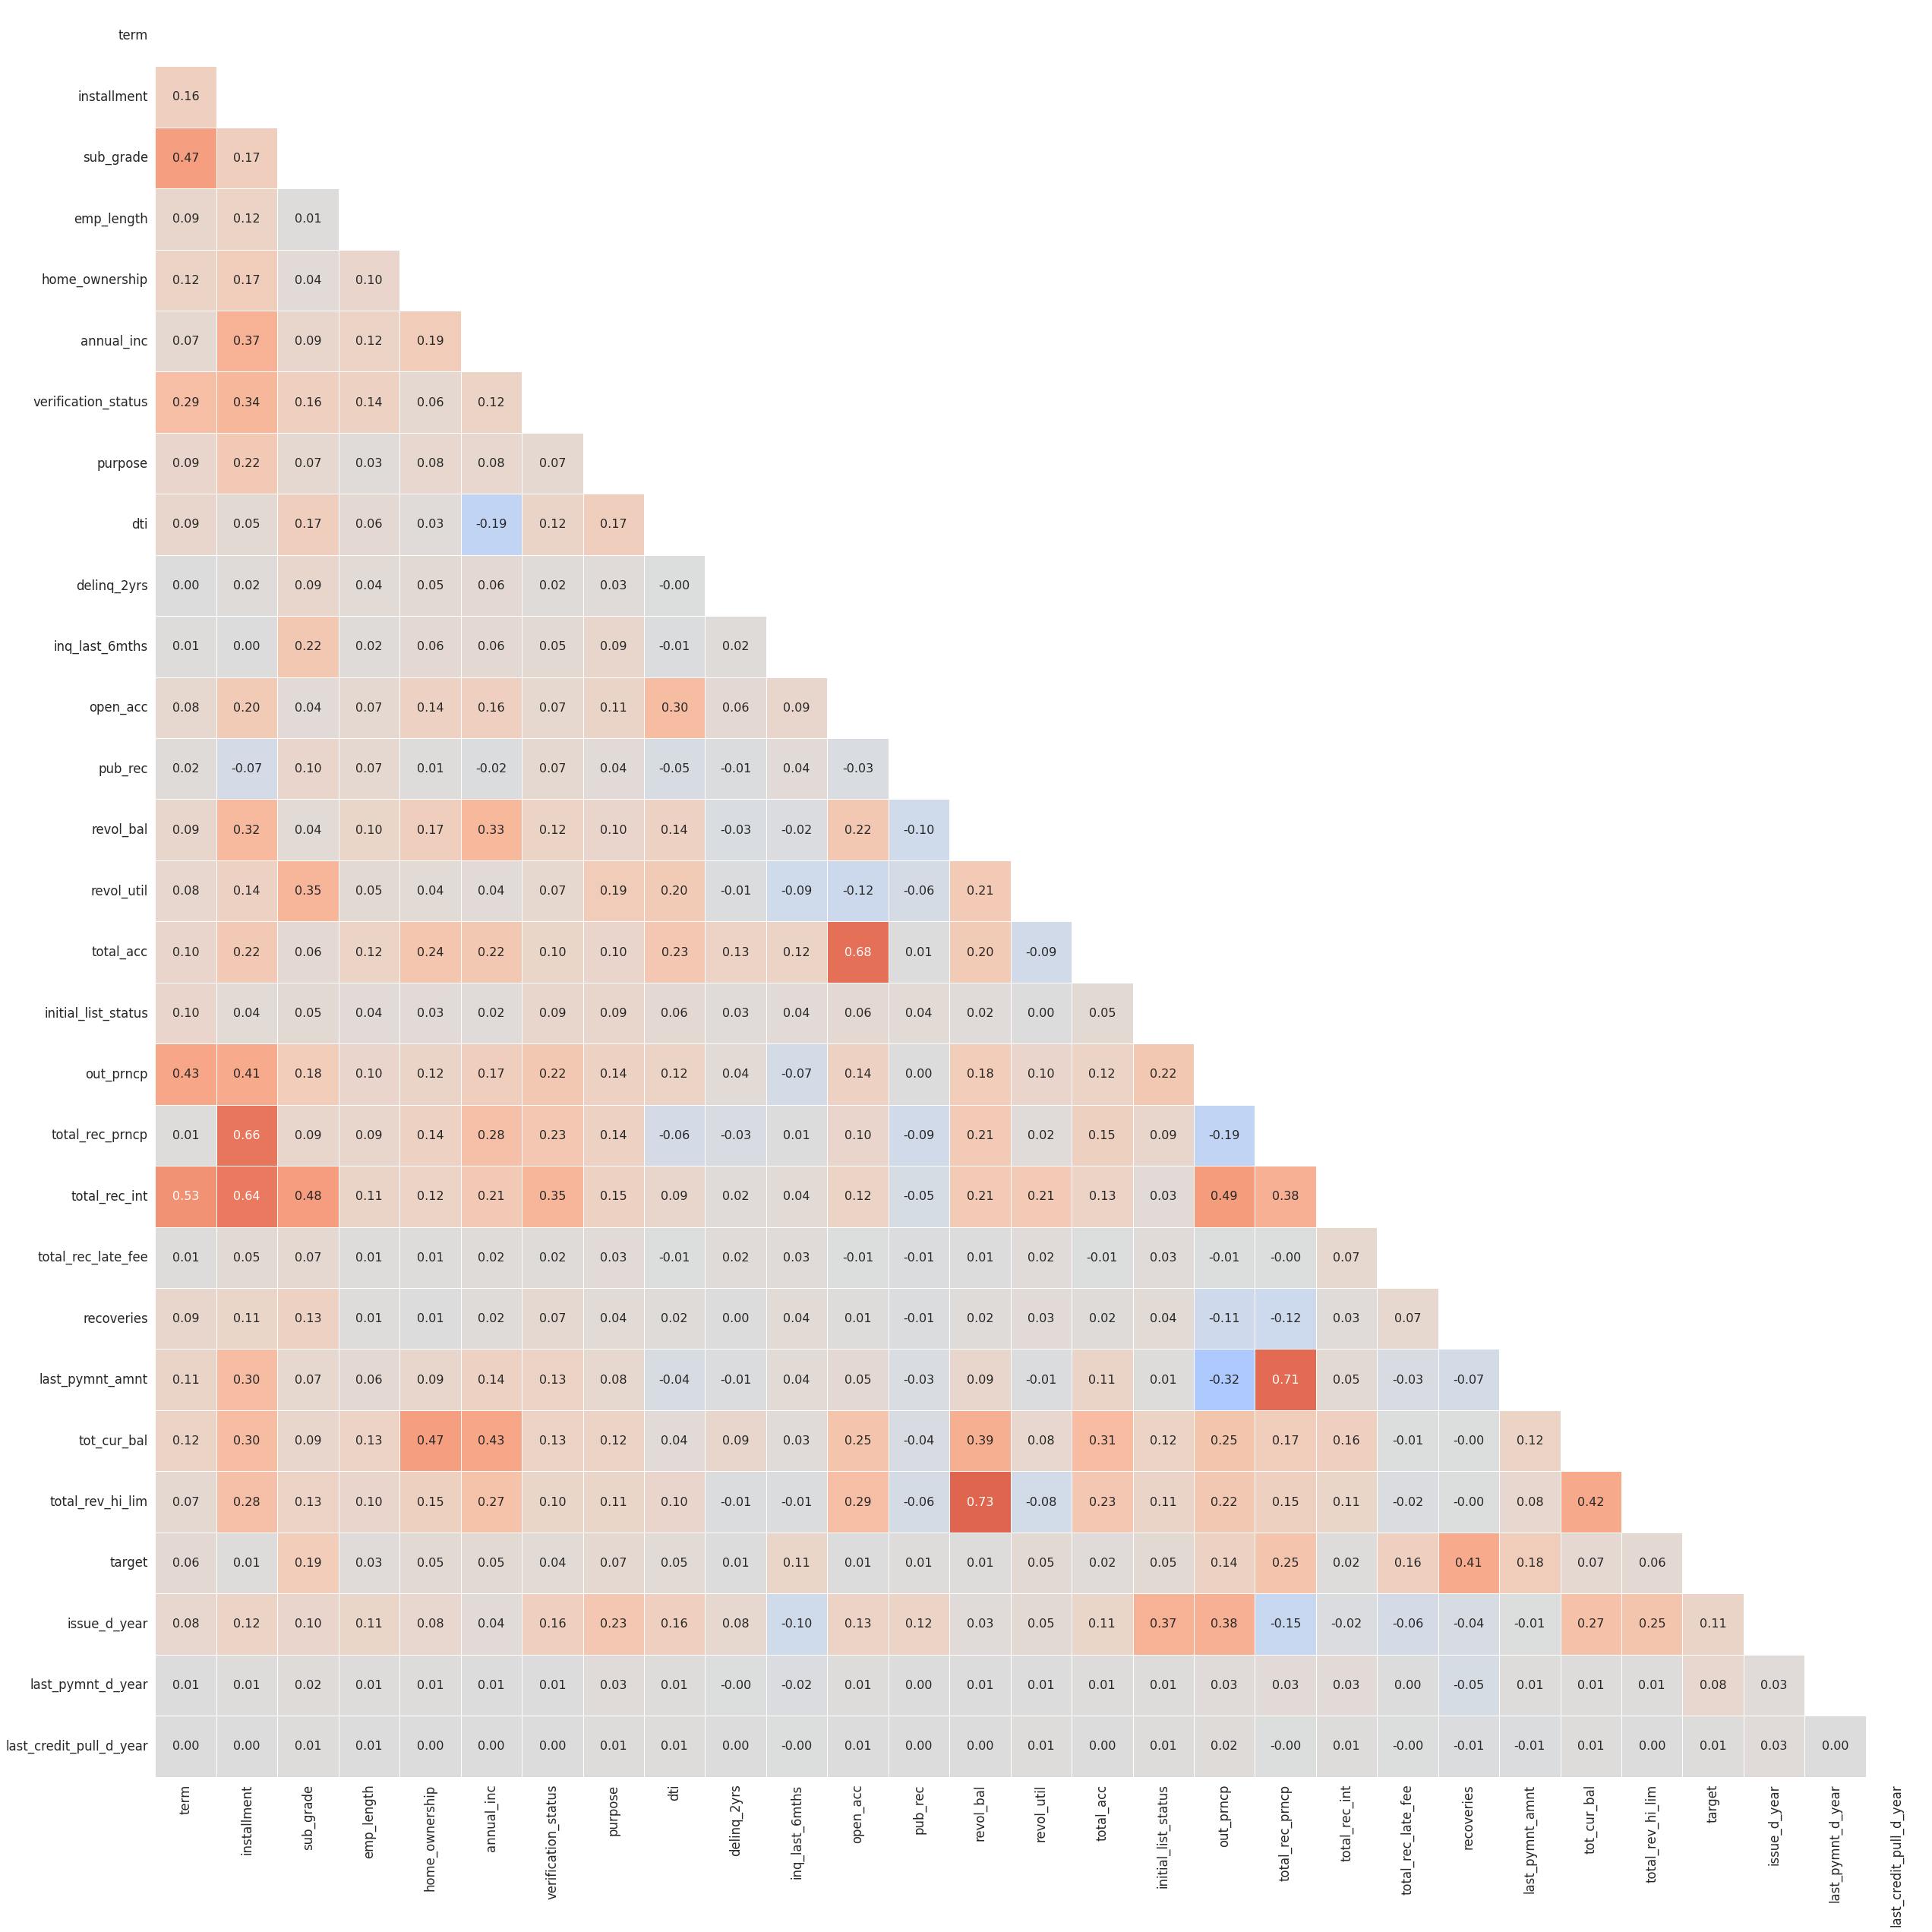

In [48]:
_, ax = plt.subplots(figsize=(40,40))

heatmap_corr_plot(corr_all, mask=True, annot=True, ax=ax)

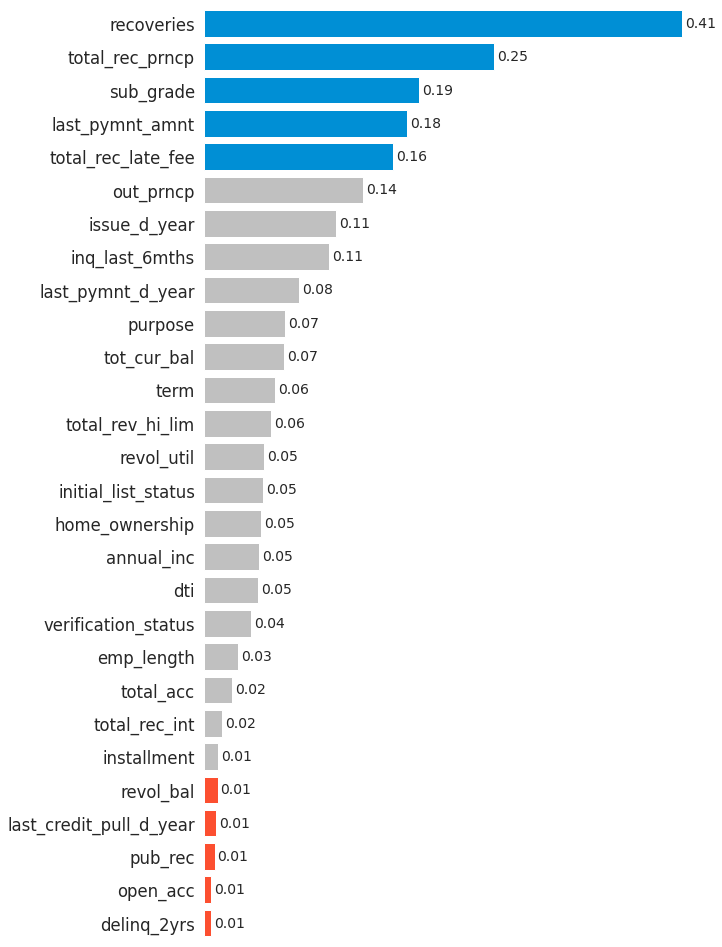

In [49]:
_, ax = plt.subplots(figsize=(8,16))

rank_bar_plot(data=corr_target, x=corr_target.values, y=corr_target.index, ax=ax)

## Train - Test Split

I use a 70% : 30% ratio for the training set and testing set respectively.

In [50]:
data_X = data.drop(columns=['target'])
data_y = data['target']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

I do train-test split first to prevent data leakage when doing the data preprocessing steps

In [51]:
column_numerical = data_X.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_X.select_dtypes(exclude=np.number).columns.values.tolist()

## Skewness & Kurtosis

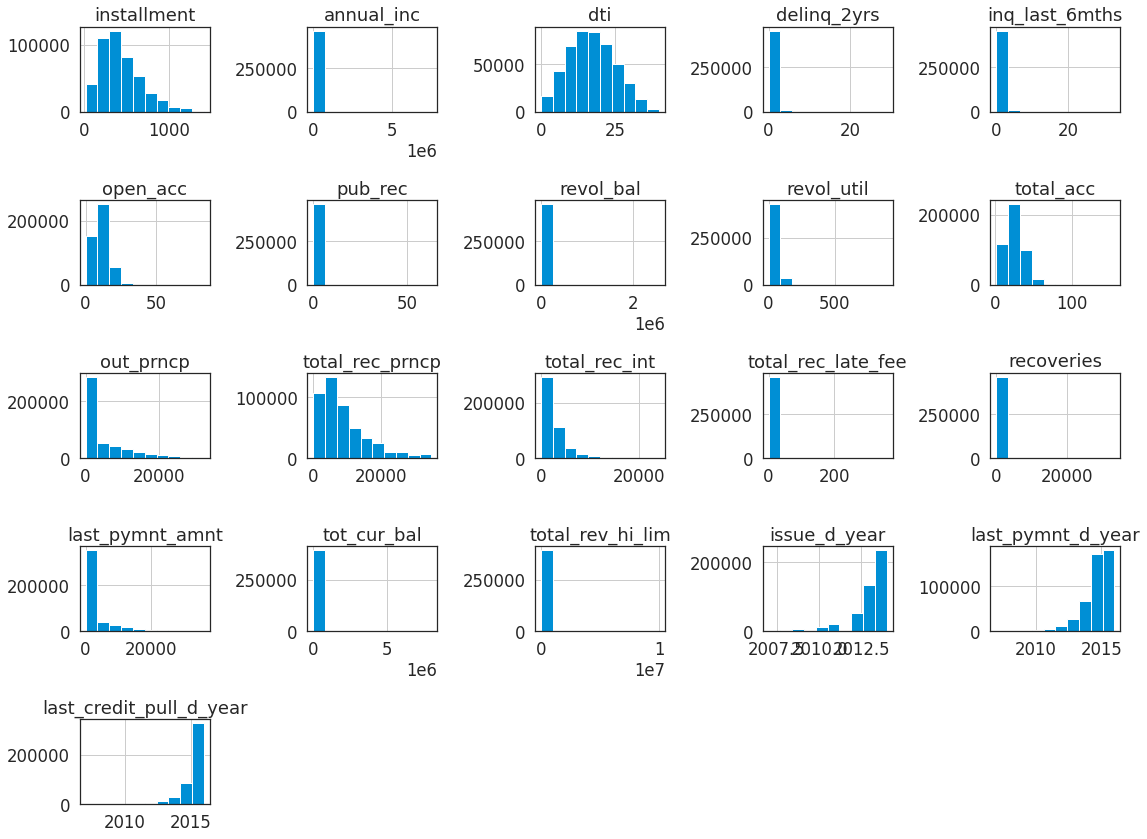

In [52]:
data[column_numerical].hist(figsize=(16,12))

plt.tight_layout()
plt.show()

At glance, we can see that there are some features that are very skewed.

### Interpreting Skewness

The rule of thumb for interpreting the skewness values:
- If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution can be called moderately skewed.
- If skewness is between −½ and +½, the distribution can be called approximately symmetric.
<br>

[Source](https://brownmath.com/stat/shape.htm#SkewnessInterpret)

In [53]:
skewness = data[column_numerical].skew().sort_values(ascending=False)
skewness = pd.DataFrame(skewness).rename(columns={0:'skewness'})
skewness.style.background_gradient()

Almost all of the numerical features are skewed!

### Interpreting Kurtosis

- A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
- A distribution with kurtosis \<3 (excess kurtosis \<0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
- A distribution with kurtosis \>3 (excess kurtosis \>0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.
<br>

[Source](https://brownmath.com/stat/shape.htm#Kurtosis)

In [54]:
kurtosis = data[column_numerical].kurtosis().sort_values(ascending=False)
kurtosis = pd.DataFrame(kurtosis).rename(columns={0:'kurtosis'})
kurtosis.style.background_gradient()

There are some features that have kurotsis value more or less than 3.

### Handling Skewness

There are some methods that can be used to handle skewness, such as:
- Log transform
- Square root transform
- Box Cox
- Fisher
- Power Transform
- etc
<br>

I will do power transformation for numerical features, except the date features.
<br><br>
When I do the power transformation for date features, I always get errors and I still can't resolve it. So, I will use another transformation for date features.

#### Numerical Features

In [55]:
column_date = ['issue_d_year', 'last_pymnt_d_year', 'last_credit_pull_d_year']

column_numerical_tmp = [col for col in column_numerical if col not in column_date]

In [56]:
for col in column_numerical_tmp:
  pt = PowerTransformer(method='yeo-johnson')
  pt.fit(X_train[[col]])

  X_train[col] = pt.transform(X_train[[col]])
  X_test[col] = pt.transform(X_test[[col]])

In [57]:
X_train[column_numerical_tmp].skew().sort_values(ascending=False)

total_rec_late_fee    6.409
recoveries            4.023
pub_rec               2.186
delinq_2yrs           1.672
inq_last_6mths        0.275
revol_bal             0.209
total_rev_hi_lim      0.074
out_prncp             0.032
total_rec_int         0.023
total_rec_prncp       0.011
open_acc              0.002
total_acc            -0.010
annual_inc           -0.014
installment          -0.014
last_pymnt_amnt      -0.028
tot_cur_bal          -0.043
dti                  -0.076
revol_util           -0.096
dtype: float64

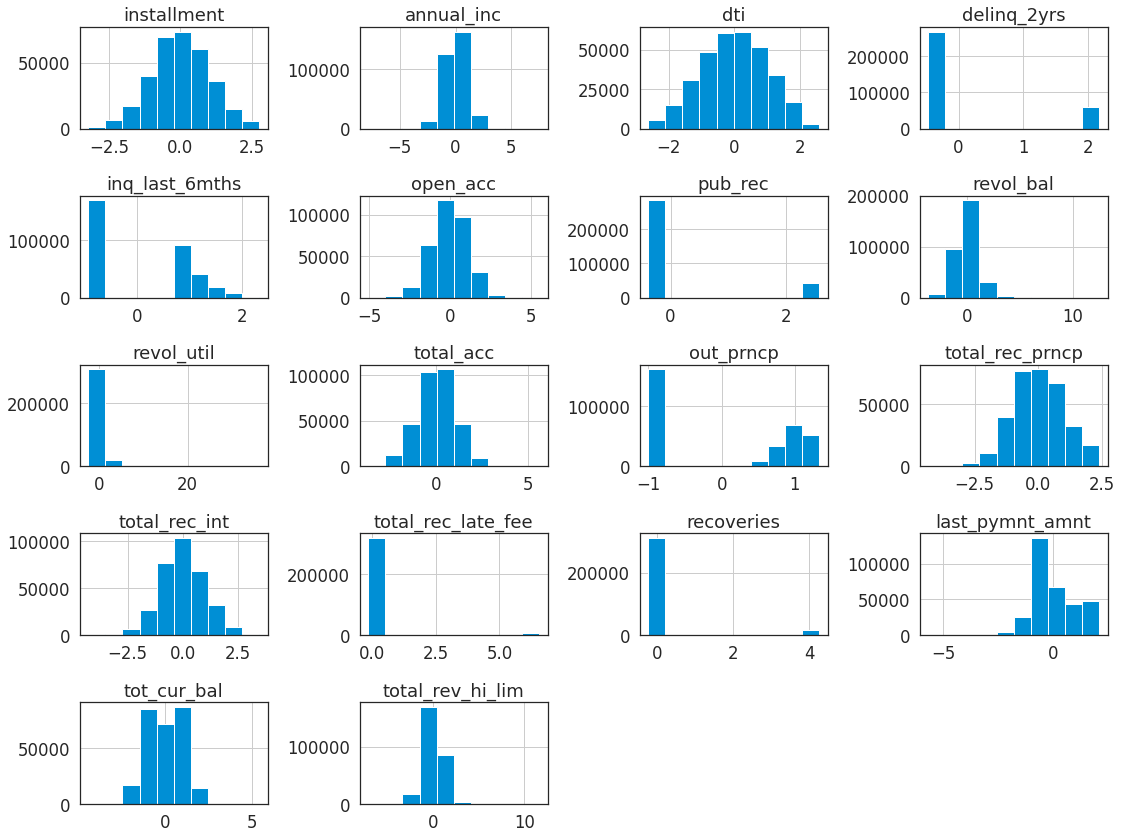

In [58]:
X_train[column_numerical_tmp].hist(figsize=(16,12))

plt.tight_layout()
plt.show()

#### Date Features

I will use a simple MinMaxScaler for date features

In [59]:
column_date = ['issue_d_year', 'last_pymnt_d_year', 'last_credit_pull_d_year']

for col in column_date:
  mms = MinMaxScaler(feature_range=(-1,1))
  mms.fit(X_train[[col]])

  X_train[col] = mms.transform(X_train[[col]])
  X_test[col] = mms.transform(X_test[[col]])

## Missing Values Imputation

The best approach to do imputation is using domain knowledge, asking an expert, or looking for its pattern. However, I don't have any experience in the finance domain. Therefore, I will use a simple imputation (univariate feature imputation) strategy:
- Mean or median for numerical features
- Mode (most frequent) for categorical features
<br><br>

Actually, there is another method for imputing missing values: multivariate feature imputation, such as KNN imputer, iterative imputer (MICE), and DataWig (from AWS Labs). I think, those methods have a better performance than a simple imputer. However, it will take a long time to train the imputer, since this dataset is the largest dataset I've ever seen.
<br><br>
If I have more time, maybe I will try the other imputation methods.

In [60]:
for col in X_train.columns:
  if col in column_categorical:
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(X_train[[col]])

    X_train[col] = imputer.transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])
  else:
    imputer = SimpleImputer(strategy='median')
    imputer.fit(X_train[[col]])

    X_train[col] = imputer.transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])

## Label Encoding

In [61]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [62]:
le.classes_

array(['Bad', 'Good'], dtype=object)

`Bad` is in the first index, so it means that `Bad = 0` and `Good = 1`.

In [63]:
print(y_train[:5].values)
print(y_train_encode[:5])

['Good' 'Good' 'Good' 'Good' 'Bad']
[1 1 1 1 0]


## One Hot Encoding

In [64]:
# drop 1 category if the feature only has 2 categories
ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_categorical])

X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

## Encoded Dataframe

I will combine the encoded features and the numerical features. Make sure that the index is the same.

In [65]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['term_ 60 months', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       

I will rename the column name to `snake_case` format.

In [66]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i])
  column_ohe[i] = column_ohe[i].replace(' ', '_')
  column_ohe[i] = column_ohe[i].replace('<', 'less_than')
  column_ohe[i] = column_ohe[i].replace('>', 'greater_than')

column_ohe

array(['term__60_months', 'sub_grade_a1', 'sub_grade_a2', 'sub_grade_a3',
       'sub_grade_a4', 'sub_grade_a5', 'sub_grade_b1', 'sub_grade_b2',
       'sub_grade_b3', 'sub_grade_b4', 'sub_grade_b5', 'sub_grade_c1',
       'sub_grade_c2', 'sub_grade_c3', 'sub_grade_c4', 'sub_grade_c5',
       'sub_grade_d1', 'sub_grade_d2', 'sub_grade_d3', 'sub_grade_d4',
       'sub_grade_d5', 'sub_grade_e1', 'sub_grade_e2', 'sub_grade_e3',
       'sub_grade_e4', 'sub_grade_e5', 'sub_grade_f1', 'sub_grade_f2',
       'sub_grade_f3', 'sub_grade_f4', 'sub_grade_f5', 'sub_grade_g1',
       'sub_grade_g2', 'sub_grade_g3', 'sub_grade_g4', 'sub_grade_g5',
       'emp_length_1_year', 'emp_length_10+_years', 'emp_length_2_years',
       'emp_length_3_years', 'emp_length_4_years', 'emp_length_5_years',
       'emp_length_6_years', 'emp_length_7_years', 'emp_length_8_years',
       'emp_length_9_years', 'emp_length_less_than_1_year',
       'home_ownership_any', 'home_ownership_mortgage',
       'home_ownership

### Train Set

In [67]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
42880        -1.485      -0.646  0.736       -0.467           0.708     0.865   
220612       -0.158      -0.880  0.283       -0.467           1.552    -1.512   
38117         0.505       2.463  0.399       -0.467           0.708     2.069   
303581       -0.774       0.069  0.642       -0.467           0.708     0.131   
80739         1.836       1.385 -1.157       -0.467           0.708    -1.162   

        pub_rec  revol_bal  revol_util  total_acc  out_prncp  total_rec_prncp  \
42880    -0.388      0.216      -0.086      0.226     -1.003           -0.631   
220612   -0.388     -0.485       1.234     -2.210     -1.003            0.447   
38117    -0.388      2.537       1.111      1.309     -1.003            1.009   
303581   -0.388     -0.721       0.159     -0.419     -1.003           -0.002   
80739    -0.388      0.195       1.840     -1.373     -1.003            0.404   

        total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
42880          -1.655              -0.152      -0.235            0.903   
220612          0.408              -0.152      -0.235           -0.520   
38117           0.729              -0.152      -0.235           -0.254   
303581         -0.715              -0.152      -0.235            1.090   
80739           1.562              -0.152       4.258            0.134   

        tot_cur_bal  total_rev_hi_lim  issue_d_year  last_pymnt_d_year  \
42880        -0.957             0.192         0.714              0.556   
220612       -0.009            -0.023         0.429              0.778   
38117        -0.009            -0.023        -0.714             -0.111   
303581        0.603            -1.073         1.000              0.778   
80739        -0.745            -0.583         0.714              0.778   

        last_credit_pull_d_year  term__60_months  sub_grade_a1  sub_grade_a2  \
42880                     1.000              0.0           0.0           0.0   
220612                    1.000              0.0           0.0           0.0   
38117                    -0.111              0.0           0.0           0.0   
303581                    1.000              0.0           0.0           0.0   
80739                     0.778              0.0           0.0           0.0   

        sub_grade_a3  sub_grade_a4  sub_grade_a5  sub_grade_b1  sub_grade_b2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_b3  sub_grade_b4  sub_grade_b5  sub_grade_c1  sub_grade_c2  \
42880            0.0           0.0           1.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           1.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_c3  sub_grade_c4  sub_grade_c5  sub_grade_d1  sub_grade_d2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           1.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           1.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_d3  sub_grade_d4  sub_grade_d5  sub_grade_e1  sub_grade_e2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0

### Test Set

In [68]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()

installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
221094       -0.286      -0.225 -0.077       -0.467          -0.934    -0.318   
337901       -0.265       0.463 -1.157        2.126           1.268    -0.318   
195442       -0.232      -0.085 -1.070       -0.467          -0.934     0.865   
41374        -0.319      -0.085  0.347       -0.467          -0.934    -0.572   
231555        0.331      -0.362  0.301       -0.467          -0.934    -0.085   

        pub_rec  revol_bal  revol_util  total_acc  out_prncp  total_rec_prncp  \
221094   -0.388     -0.548       0.996     -0.222     -1.003            0.447   
337901    2.574     -1.280      -1.742     -0.741      0.961           -0.557   
195442   -0.388     -0.337      -0.339     -0.741     -1.003            0.447   
41374    -0.388      3.986      -1.329     -0.630     -1.003            0.447   
231555   -0.388      1.128       0.459     -0.035      1.194           -0.967   

        total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
221094         -0.693              -0.152      -0.235            1.320   
337901         -0.347              -0.152      -0.235           -0.581   
195442          0.095              -0.152      -0.235            0.804   
41374          -0.289              -0.152      -0.235            0.781   
231555          0.426              -0.152      -0.235           -0.342   

        tot_cur_bal  total_rev_hi_lim  issue_d_year  last_pymnt_d_year  \
221094       -0.009            -0.023         0.429              0.333   
337901       -1.112            -0.255         1.000              0.778   
195442        0.669            -0.329         0.429              0.778   
41374        -0.009            -0.023        -0.714             -0.111   
231555        0.589             0.894         1.000              0.778   

        last_credit_pull_d_year  term__60_months  sub_grade_a1  sub_grade_a2  \
221094                    0.778              0.0           0.0           0.0   
337901                    1.000              0.0           0.0           0.0   
195442                    0.778              0.0           0.0           0.0   
41374                    -0.111              0.0           0.0           0.0   
231555                    1.000              1.0           0.0           0.0   

        sub_grade_a3  sub_grade_a4  sub_grade_a5  sub_grade_b1  sub_grade_b2  \
221094           0.0           0.0           0.0           0.0           1.0   
337901           0.0           0.0           0.0           0.0           0.0   
195442           0.0           0.0           0.0           0.0           0.0   
41374            0.0           1.0           0.0           0.0           0.0   
231555           0.0           0.0           0.0           0.0           0.0   

        sub_grade_b3  sub_grade_b4  sub_grade_b5  sub_grade_c1  sub_grade_c2  \
221094           0.0           0.0           0.0           0.0           0.0   
337901           0.0           1.0           0.0           0.0           0.0   
195442           0.0           1.0           0.0           0.0           0.0   
41374            0.0           0.0           0.0           0.0           0.0   
231555           0.0           0.0           0.0           0.0           0.0   

        sub_grade_c3  sub_grade_c4  sub_grade_c5  sub_grade_d1  sub_grade_d2  \
221094           0.0           0.0           0.0           0.0           0.0   
337901           0.0           0.0           0.0           0.0           0.0   
195442           0.0           0.0           0.0           0.0           0.0   
41374            0.0           0.0           0.0           0.0           0.0   
231555           0.0           0.0           1.0           0.0           0.0   

        sub_grade_d3  sub_grade_d4  sub_grade_d5  sub_grade_e1  sub_grade_e2  \
221094           0.0           0.0           0.0           0.0           0.0   
337901           0.0           0.0           0.0           0

### Full Dataset

In [69]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='target', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='target', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['target_1'].fillna(data_encode['target_2'], inplace=True)
data_encode.drop(columns='target_2', inplace=True)
data_encode.rename(columns={'target_1':'target'}, inplace=True)

data_encode.head()

installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
42880        -1.485      -0.646  0.736       -0.467           0.708     0.865   
220612       -0.158      -0.880  0.283       -0.467           1.552    -1.512   
38117         0.505       2.463  0.399       -0.467           0.708     2.069   
303581       -0.774       0.069  0.642       -0.467           0.708     0.131   
80739         1.836       1.385 -1.157       -0.467           0.708    -1.162   

        pub_rec  revol_bal  revol_util  total_acc  out_prncp  total_rec_prncp  \
42880    -0.388      0.216      -0.086      0.226     -1.003           -0.631   
220612   -0.388     -0.485       1.234     -2.210     -1.003            0.447   
38117    -0.388      2.537       1.111      1.309     -1.003            1.009   
303581   -0.388     -0.721       0.159     -0.419     -1.003           -0.002   
80739    -0.388      0.195       1.840     -1.373     -1.003            0.404   

        total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
42880          -1.655              -0.152      -0.235            0.903   
220612          0.408              -0.152      -0.235           -0.520   
38117           0.729              -0.152      -0.235           -0.254   
303581         -0.715              -0.152      -0.235            1.090   
80739           1.562              -0.152       4.258            0.134   

        tot_cur_bal  total_rev_hi_lim  issue_d_year  last_pymnt_d_year  \
42880        -0.957             0.192         0.714              0.556   
220612       -0.009            -0.023         0.429              0.778   
38117        -0.009            -0.023        -0.714             -0.111   
303581        0.603            -1.073         1.000              0.778   
80739        -0.745            -0.583         0.714              0.778   

        last_credit_pull_d_year  term__60_months  sub_grade_a1  sub_grade_a2  \
42880                     1.000              0.0           0.0           0.0   
220612                    1.000              0.0           0.0           0.0   
38117                    -0.111              0.0           0.0           0.0   
303581                    1.000              0.0           0.0           0.0   
80739                     0.778              0.0           0.0           0.0   

        sub_grade_a3  sub_grade_a4  sub_grade_a5  sub_grade_b1  sub_grade_b2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_b3  sub_grade_b4  sub_grade_b5  sub_grade_c1  sub_grade_c2  \
42880            0.0           0.0           1.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           1.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_c3  sub_grade_c4  sub_grade_c5  sub_grade_d1  sub_grade_d2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           1.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           1.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_d3  sub_grade_d4  sub_grade_d5  sub_grade_e1  sub_grade_e2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0

I will create another dataframe from the train set (X & y) for later use.

In [70]:
data_encode_train = pd.concat([X_train_encode, pd.Series(y_train_encode, name='target', index=X_train_encode.index)], axis=1)
data_encode_train.head()

installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
42880        -1.485      -0.646  0.736       -0.467           0.708     0.865   
220612       -0.158      -0.880  0.283       -0.467           1.552    -1.512   
38117         0.505       2.463  0.399       -0.467           0.708     2.069   
303581       -0.774       0.069  0.642       -0.467           0.708     0.131   
80739         1.836       1.385 -1.157       -0.467           0.708    -1.162   

        pub_rec  revol_bal  revol_util  total_acc  out_prncp  total_rec_prncp  \
42880    -0.388      0.216      -0.086      0.226     -1.003           -0.631   
220612   -0.388     -0.485       1.234     -2.210     -1.003            0.447   
38117    -0.388      2.537       1.111      1.309     -1.003            1.009   
303581   -0.388     -0.721       0.159     -0.419     -1.003           -0.002   
80739    -0.388      0.195       1.840     -1.373     -1.003            0.404   

        total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
42880          -1.655              -0.152      -0.235            0.903   
220612          0.408              -0.152      -0.235           -0.520   
38117           0.729              -0.152      -0.235           -0.254   
303581         -0.715              -0.152      -0.235            1.090   
80739           1.562              -0.152       4.258            0.134   

        tot_cur_bal  total_rev_hi_lim  issue_d_year  last_pymnt_d_year  \
42880        -0.957             0.192         0.714              0.556   
220612       -0.009            -0.023         0.429              0.778   
38117        -0.009            -0.023        -0.714             -0.111   
303581        0.603            -1.073         1.000              0.778   
80739        -0.745            -0.583         0.714              0.778   

        last_credit_pull_d_year  term__60_months  sub_grade_a1  sub_grade_a2  \
42880                     1.000              0.0           0.0           0.0   
220612                    1.000              0.0           0.0           0.0   
38117                    -0.111              0.0           0.0           0.0   
303581                    1.000              0.0           0.0           0.0   
80739                     0.778              0.0           0.0           0.0   

        sub_grade_a3  sub_grade_a4  sub_grade_a5  sub_grade_b1  sub_grade_b2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_b3  sub_grade_b4  sub_grade_b5  sub_grade_c1  sub_grade_c2  \
42880            0.0           0.0           1.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           1.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_c3  sub_grade_c4  sub_grade_c5  sub_grade_d1  sub_grade_d2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           1.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           1.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_d3  sub_grade_d4  sub_grade_d5  sub_grade_e1  sub_grade_e2  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0

## Correlation

In [71]:
corr_matrix = data_encode.corr()

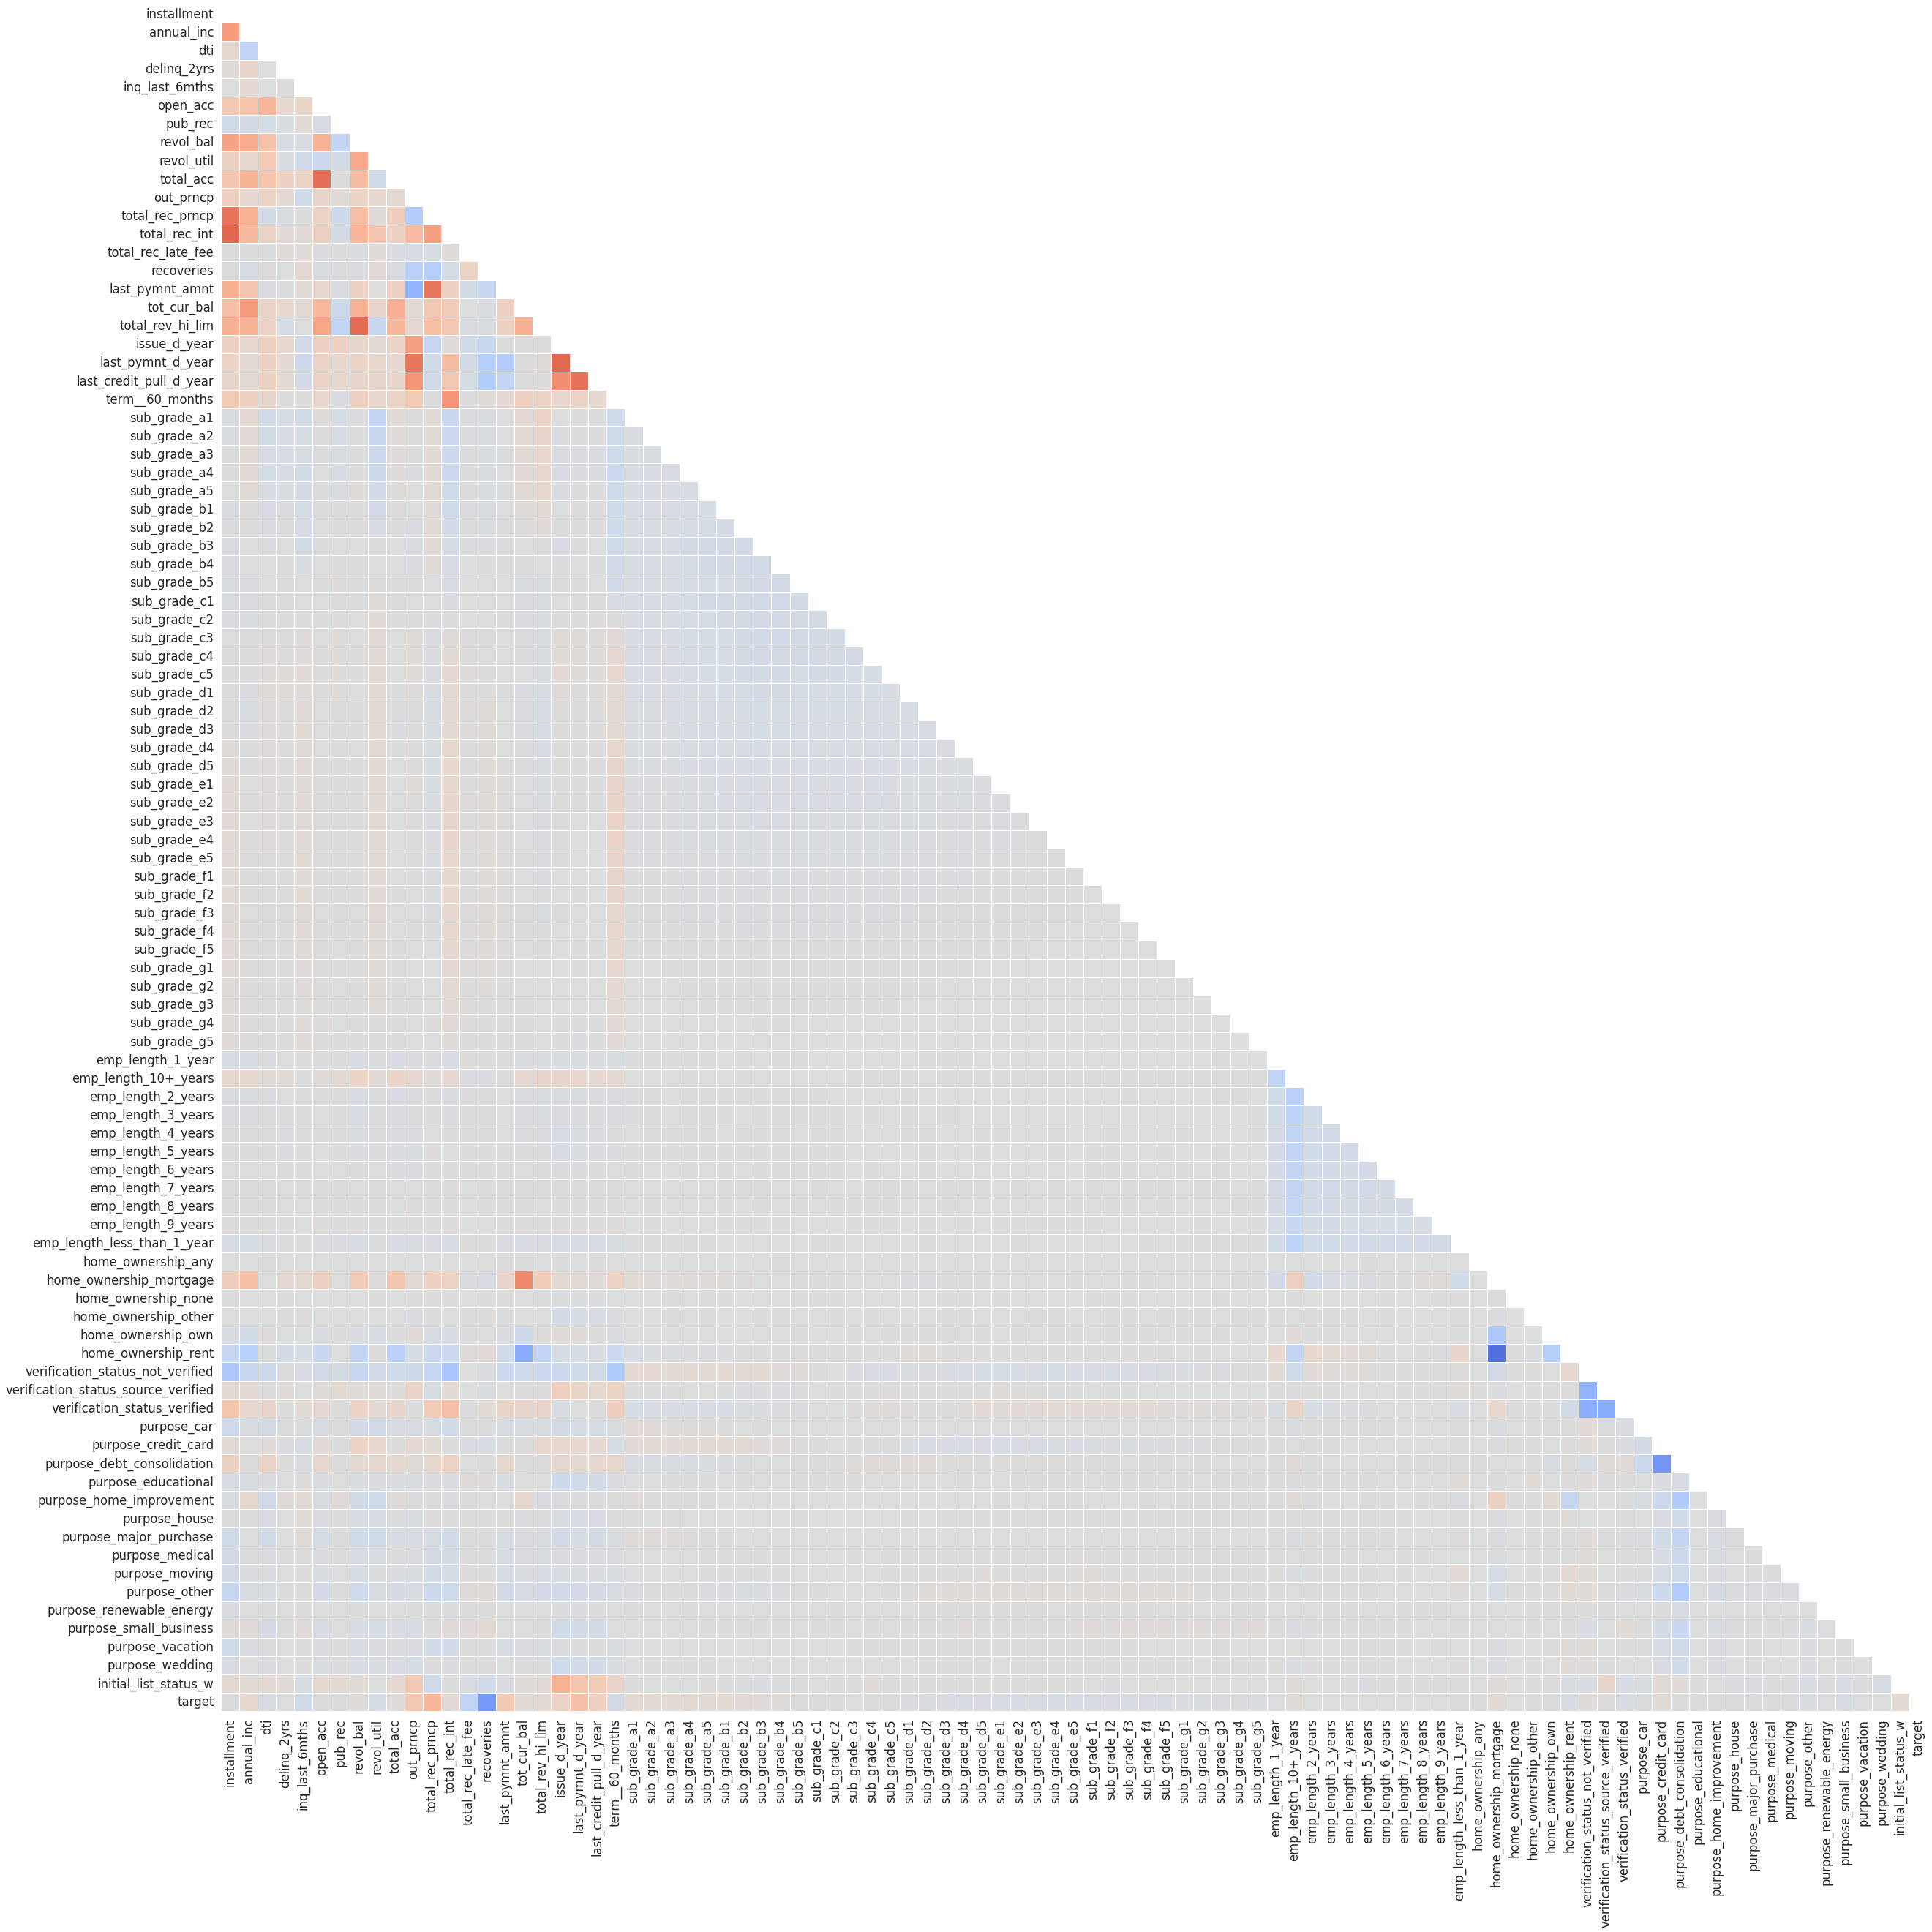

In [72]:
_, ax = plt.subplots(figsize=(40,40))

heatmap_corr_plot(corr_matrix, mask=True, ax=ax)

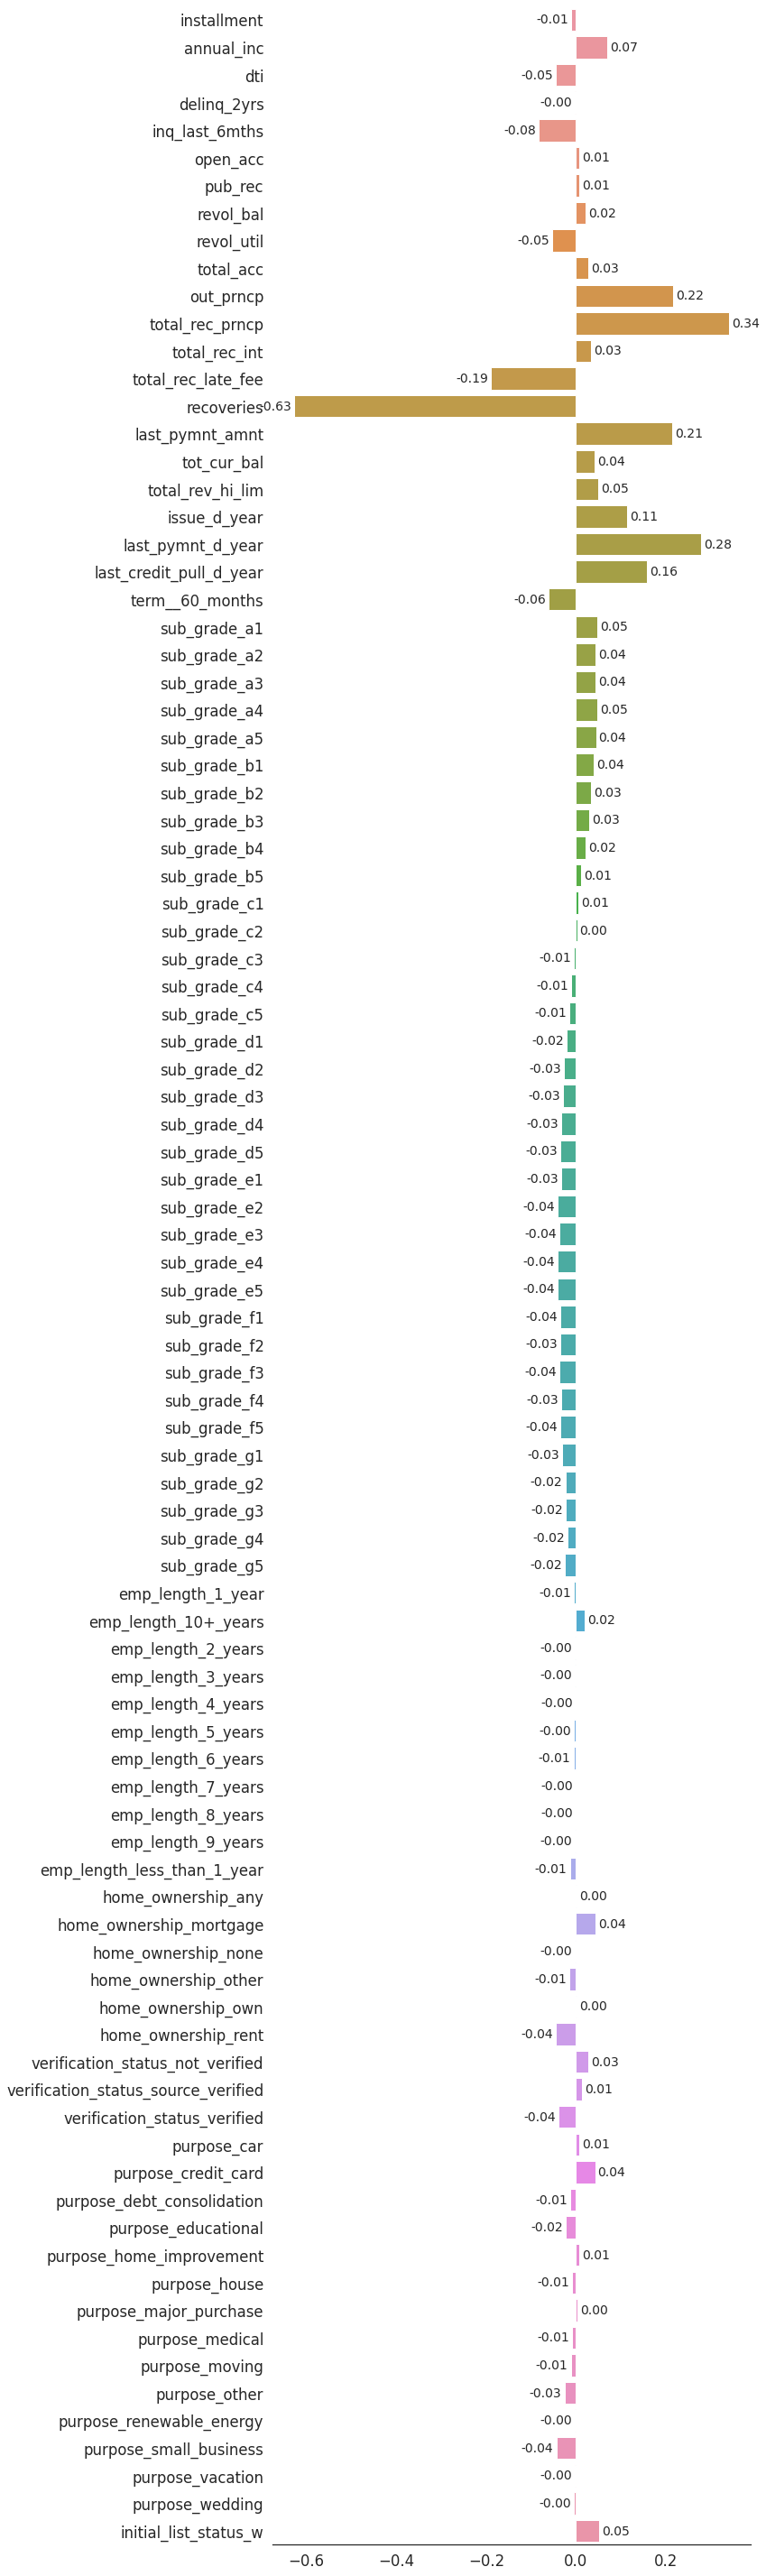

In [73]:
corr_target = corr_matrix['target'].drop('target')

fig, ax = plt.subplots(figsize=(12,40))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

sns.despine(left=True)
plt.tight_layout()

plt.show()

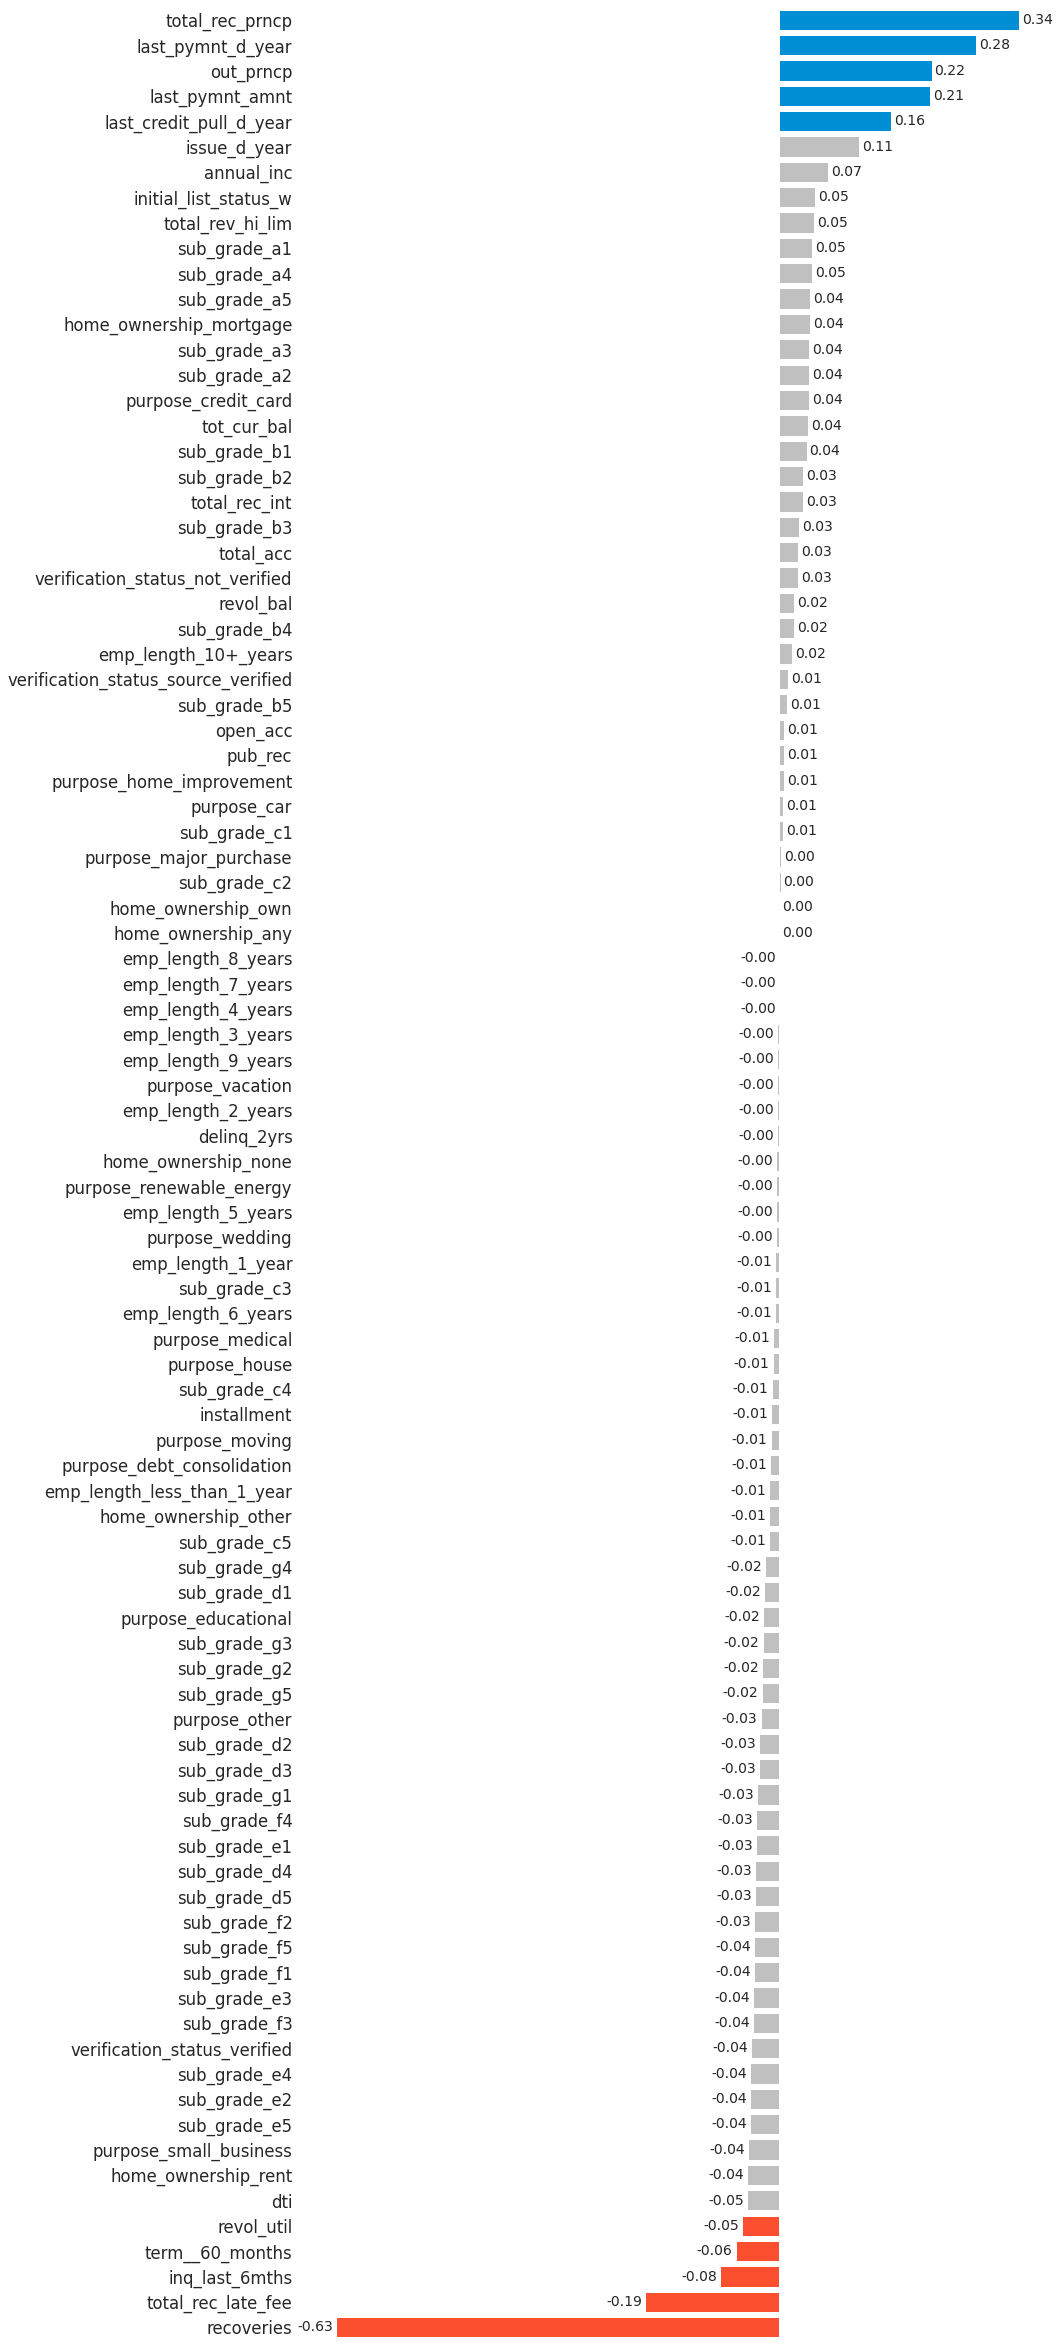

In [74]:
corr_target = corr_matrix['target'].drop('target').sort_values(ascending=False)

_, ax = plt.subplots(figsize=(12,40))

rank_bar_plot(data=corr_target, x=corr_target.values, y=corr_target.index, ax=ax)

## Oversampling with SMOTE

This dataset is imbalanced. So, my approach to get it balanced is to use SMOTE, one of the oversampling methods.
<br><br>
Note: Oversampling should only be performed on the train set.

In [75]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_encode, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['target'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [76]:
data_encode_train['target'].value_counts()

1    286275
0     40124
Name: target, dtype: int64

In [77]:
data_smote['target'].value_counts()

1    286275
0    286275
Name: target, dtype: int64

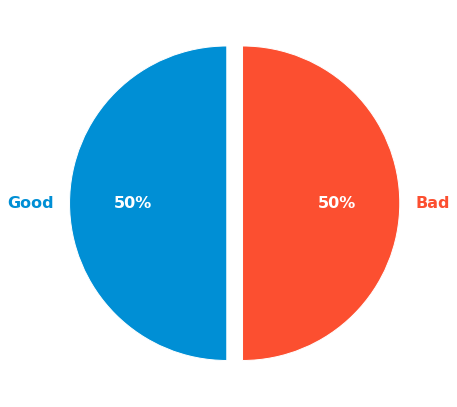

In [78]:
pie_data = data_smote['target'].value_counts(normalize=True).values * 100
pie_label = data_smote['target'].value_counts(normalize=True).index.to_list()
pie_label = ['Good' if x==1 else 'Bad' for x in pie_label]

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

plt.show()

Now, both bad (0) and good (1) loan status categories have the same number.

# Model Development (Without Feature Selection)

My computer resource is limited, so I use Google Colab to make this project. However, when I use Google Colab I always run out of resources too (crashing and restarting its runtime). Therefore, I will limit my project to using only 3 ML algorithms: Catboost, XGBoost, and LightGBM.

## Default Parameter

### Parameter List

For now, I will use the default parameter

In [79]:
model_list = {
    'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_encode.copy()
y_test_model = y_test_encode.copy()

### CatBoost

In [80]:
# model_list['CatBoost'].fit(X_train_model, y_train_model)
# y_pred = model_list['CatBoost'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.973     0.824     0.893     17196
           1      0.976     0.997     0.986    122690

    accuracy                          0.976    139886
   macro avg      0.974     0.911     0.939    139886
weighted avg      0.976     0.976     0.975    139886

```



### XGBoost

In [81]:
# model_list['XGBoost'].fit(X_train_model, y_train_model)
# y_pred = model_list['XGBoost'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.762     0.862     0.809     17196
           1      0.980     0.962     0.971    122690

    accuracy                          0.950    139886
   macro avg      0.871     0.912     0.890    139886
weighted avg      0.954     0.950     0.951    139886

```



### LightGBM

In [82]:
# model_list['LightGBM'].fit(X_train_model, y_train_model)
# y_pred = model_list['LightGBM'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.981     0.801     0.882     17196
           1      0.973     0.998     0.985    122690

    accuracy                          0.974    139886
   macro avg      0.977     0.899     0.933    139886
weighted avg      0.974     0.974     0.972    139886

```



## Hyperparameter Tuning

I will use Optuna for hyperparameter tuning. However, I will only tune for the XGBoost and LightGBM. Again, that's because the limited resources, like this:


```
CatBoost is using more CPU RAM (10.5GiB) than the limit (3GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(139888) > ResourceQuota(0)
```

But, I will keep the code (commented)


### CatBoost

#### Tuning with Optuna

In [83]:
# def objective(trial):
#   param = {
#       "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
#       "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
#       "depth": trial.suggest_int("depth", 1, 12),
#       "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
#       "bootstrap_type": trial.suggest_categorical(
#           "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
#       ),
#       "used_ram_limit": "3gb",
#   }

#   if param["bootstrap_type"] == "Bayesian":
#       param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
#   elif param["bootstrap_type"] == "Bernoulli":
#       param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

#   gbm = cb.CatBoostClassifier(**param)

#   gbm.fit(X_train_model, y_train_model, eval_set=[(X_test_model, y_test_model)], verbose=0, early_stopping_rounds=100)

#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # accuracy = accuracy_score(y_test_model, pred_labels)
#   # return accuracy

#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [84]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

#### Model with Best Params

In [85]:
# model = CatBoostClassifier(random_state=1)
# model.set_params(**trial.params)

In [86]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

### XGBoost

#### Optimize F1 Score (Negative Class)

In [87]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [88]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [89]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

In [90]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
XGBClassifier(alpha=0.0004699371185301904, colsample_bytree=0.9866005599202406,
              eta=0.9653310706055631, gamma=0.0002444269453663269,
              grow_policy='lossguide', lambda=0.9480447148778285, max_depth=5,
              min_child_weight=6, random_state=1, subsample=0.7017940673930518)
```





```
              precision    recall  f1-score   support

           0      0.925     0.810     0.864     17196
           1      0.974     0.991     0.982    122690

    accuracy                          0.969    139886
   macro avg      0.949     0.901     0.923    139886
weighted avg      0.968     0.969     0.968    139886

```



#### Optimize Accuracy

In [91]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [92]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [93]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

In [94]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
XGBClassifier(alpha=2.5545043502744088e-06, colsample_bytree=0.397594418131986,
              eta=0.2488104995289275, gamma=0.006210098811705436,
              grow_policy='lossguide', lambda=3.6057227077300644e-06,
              max_depth=9, min_child_weight=9, random_state=1,
              subsample=0.9985094767068763)
```





```
              precision    recall  f1-score   support

           0      0.973     0.809     0.884     17196
           1      0.974     0.997     0.985    122690

    accuracy                          0.974    139886
   macro avg      0.974     0.903     0.935    139886
weighted avg      0.974     0.974     0.973    139886

```



#### Optimize ROC-AUC

In [95]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   objective_value = roc_auc_score(y_test_model, pred_labels)
#   return objective_value

In [96]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [97]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

In [98]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
XGBClassifier(alpha=0.004490194299447426, colsample_bytree=0.7402369629564358,
              eta=0.1757474316863226, gamma=0.1275821482410153,
              grow_policy='depthwise', lambda=0.00022593888498534894,
              max_depth=7, min_child_weight=4, random_state=1,
              subsample=0.6116270349704465)
```





```
              precision    recall  f1-score   support

           0      0.966     0.804     0.878     17196
           1      0.973     0.996     0.985    122690

    accuracy                          0.973    139886
   macro avg      0.970     0.900     0.931    139886
weighted avg      0.972     0.973     0.971    139886

```



### LightGBM

#### Optimize F1 Score (Negative Class)

In [99]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [100]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [101]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

In [102]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
LGBMClassifier(bagging_fraction=0.9610977631287754, bagging_freq=1,
               feature_fraction=0.7445795119596752,
               lambda_l1=2.31464679158062e-08, lambda_l2=1.1986885518677876e-08,
               min_child_samples=14, num_leaves=232, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.975     0.823     0.892     17196
           1      0.976     0.997     0.986    122690

    accuracy                          0.976    139886
   macro avg      0.975     0.910     0.939    139886
weighted avg      0.976     0.976     0.975    139886

```



#### Optimize Accuracy

In [103]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [104]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [105]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

In [106]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
LGBMClassifier(bagging_fraction=0.9634393134433561, bagging_freq=3,
               feature_fraction=0.949087561556516,
               lambda_l1=2.8655830436150844e-05,
               lambda_l2=9.122782607759617e-05, min_child_samples=71,
               num_leaves=153, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.975     0.820     0.891     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.975     0.908     0.938    139886
weighted avg      0.975     0.975     0.974    139886

```



#### Optimize ROC-AUC

In [107]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   objective_value = roc_auc_score(y_test_model, pred_labels)
#   return objective_value

In [108]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [109]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

In [110]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
LGBMClassifier(bagging_fraction=0.6829539687016253, bagging_freq=5,
               feature_fraction=0.8364949955230716,
               lambda_l1=8.206441585710512e-06, lambda_l2=0.0048227073490543105,
               min_child_samples=54, num_leaves=252, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.971     0.821     0.890     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.973     0.909     0.938    139886
weighted avg      0.975     0.975     0.974    139886

```



# Model Development (With Feature Selection 75%)

## Feature Selection

### Univariate Filter

I will use ANOVA to do feature selection.

In [111]:
# threshold_percentage = 0.75
# threshold = int(threshold_percentage * X_train_encode.shape[1])

# filter = SelectKBest(score_func=f_classif, k=threshold)
# filter.fit(X_train_encode, y_train_encode)

# X_train_filter = filter.transform(X_train_encode)
# X_test_filter = filter.transform(X_test_encode)

# print('before filter\t:', X_train_encode.shape)
# print('after filter\t:', X_train_filter.shape)

In [112]:
# # viz
# selected_feature = filter.get_feature_names_out()
# feature_name = filter.feature_names_in_
# feature_score = filter.scores_

# # add to dataframe
# feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
# feature_selection.reset_index(drop=True, inplace=True)

# # create flag
# selected = list()
# for i in range(0, X_train_encode.shape[1]):
#   if i < threshold:
#     selected.append(True)
#   else:
#     selected.append(False)

# selected_s = pd.Series(selected, name='selected')
# feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# # highlight the top features
# palette = []
# for i in range(0, len(feature_selection)):
#   if i < threshold:
#     palette.append('#008FD5')
#   else:
#     palette.append('silver')

# fig, ax = plt.subplots(figsize=(12,40))

# sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
# # ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# # custom y label color
# for i, label in enumerate(ax.yaxis.get_ticklabels()):
#   if feature_selection.loc[i, 'selected'] == False:
#     label.set_color('silver')

# # custom bar label visibility
# for con in ax.containers:
#   # labels = [val for val in con.datavalues]
#   labels = con.datavalues
#   labels_len = len(labels)

#   # masking the top features
#   np.put(labels, np.arange(threshold,labels_len), [-1])

#   # hide the labels for non-top features
#   labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

#   ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

# ax.set_xticklabels([])
# ax.set_xlabel('')
# ax.set_ylabel('')

# sns.despine(left=True, bottom=True)

# plt.show()

### Oversampling with SMOTE

Based on the SMOTE paper, we have to do feature selection first, then do the oversampling. So, I will re-SMOTE again after doing the feature selection.

In [113]:
# smote = SMOTE(random_state=1)

# X_train_smote_filter, y_train_smote_filter = smote.fit_resample(X_train_filter, y_train_encode)

# X_train_smote_filter_df = pd.DataFrame(X_train_smote_filter, columns=selected_feature)
# y_train_smote_filter_df = pd.DataFrame(y_train_smote_filter, columns=['target'])

# data_smote_filter = pd.concat([X_train_smote_filter_df, y_train_smote_filter_df], axis=1)

## Default Parameter

### Parameter List

For now, I will use the default parameter

In [114]:
# model_list = {
#     'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
#     'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
#     'LightGBM':LGBMClassifier(random_state=1),
# }

# X_train_model = X_train_smote_filter.copy()
# y_train_model = y_train_smote_filter.copy()

# X_test_model = X_test_filter.copy()
# y_test_model = y_test_encode.copy()

### CatBoost

In [115]:
# model_list['CatBoost'].fit(X_train_model, y_train_model)
# y_pred = model_list['CatBoost'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.974     0.827     0.894     17196
           1      0.976     0.997     0.986    122690

    accuracy                          0.976    139886
   macro avg      0.975     0.912     0.940    139886
weighted avg      0.976     0.976     0.975    139886

```



### XGBoost

In [116]:
# model_list['XGBoost'].fit(X_train_model, y_train_model)
# y_pred = model_list['XGBoost'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.739     0.870     0.799     17196
           1      0.981     0.957     0.969    122690

    accuracy                          0.946    139886
   macro avg      0.860     0.913     0.884    139886
weighted avg      0.952     0.946     0.948    139886

```



### LightGBM

In [117]:
# model_list['LightGBM'].fit(X_train_model, y_train_model)
# y_pred = model_list['LightGBM'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.971     0.807     0.882     17196
           1      0.974     0.997     0.985    122690

    accuracy                          0.973    139886
   macro avg      0.973     0.902     0.933    139886
weighted avg      0.973     0.973     0.972    139886

```



## Hyperparameter Tuning

I will use Optuna for hyperparameter tuning. However, I will only tune for the XGBoost and LightGBM. Again, that's because the limited resources, like this:


```
CatBoost is using more CPU RAM (10.5GiB) than the limit (3GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(139888) > ResourceQuota(0)
```


### XGBoost

#### Optimize F1 Score (Negative Class)

In [118]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [119]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [120]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

In [121]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
XGBClassifier(alpha=0.00012457883386065582, booster='dart',
              colsample_bytree=0.6463657784331867, eta=0.04844119500364146,
              gamma=8.617261333586337e-05, grow_policy='lossguide',
              lambda=0.7447689382841199, max_depth=9, min_child_weight=7,
              normalize_type='forest', random_state=1,
              rate_drop=0.0022173749255834777, sample_type='uniform',
              skip_drop=0.015126741168672055, subsample=0.7424292112455655)
```





```
              precision    recall  f1-score   support

           0      0.965     0.816     0.884     17196
           1      0.975     0.996     0.985    122690

    accuracy                          0.974    139886
   macro avg      0.970     0.906     0.935    139886
weighted avg      0.974     0.974     0.973    139886

```



#### Optimize Accuracy

In [122]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [123]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [124]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

In [125]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
XGBClassifier(alpha=6.80718594162358e-07, booster='dart',
              colsample_bytree=0.5426509648692663, eta=0.037738618041817974,
              gamma=0.00035741355638117784, grow_policy='lossguide',
              lambda=0.00010753576598217694, max_depth=9, min_child_weight=6,
              normalize_type='forest', random_state=1,
              rate_drop=0.011112490481009632, sample_type='uniform',
              skip_drop=0.025689224892135196, subsample=0.37808928997923597)
```





```
              precision    recall  f1-score   support

           0      0.955     0.820     0.882     17196
           1      0.975     0.995     0.985    122690

    accuracy                          0.973    139886
   macro avg      0.965     0.907     0.933    139886
weighted avg      0.973     0.973     0.972    139886

```



#### Optimize ROC-AUC

In [126]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   objective_value = roc_auc_score(y_test_model, pred_labels)
#   return objective_value

In [127]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [128]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

In [129]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
XGBClassifier(alpha=0.0007107150342277772, colsample_bytree=0.6403579678447128,
              eta=1.3005608759829545e-08, gamma=0.036613236765079826,
              grow_policy='depthwise', lambda=1.042018394648854e-06,
              max_depth=9, min_child_weight=6, random_state=1,
              subsample=0.5235845630494889)
```





```
              precision    recall  f1-score   support

           0      0.962     0.815     0.883     17196
           1      0.975     0.996     0.985    122690

    accuracy                          0.973    139886
   macro avg      0.969     0.905     0.934    139886
weighted avg      0.973     0.973     0.972    139886

```



### LightGBM

#### Optimize F1 Score (Negative Class)

In [130]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [131]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [132]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

In [133]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
LGBMClassifier(bagging_fraction=0.9934849339435815, bagging_freq=2,
               feature_fraction=0.836924741912108,
               lambda_l1=0.0017869452279403984, lambda_l2=1.596474666109094e-05,
               min_child_samples=29, num_leaves=151, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.971     0.823     0.891     17196
           1      0.976     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.973     0.910     0.938    139886
weighted avg      0.975     0.975     0.974    139886

```



#### Optimize Accuracy

In [134]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [135]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [136]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

In [137]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
LGBMClassifier(bagging_fraction=0.9857748492802672, bagging_freq=5,
               feature_fraction=0.8002206391652996,
               lambda_l1=3.2550467304771144e-05,
               lambda_l2=0.00031529236317410266, min_child_samples=73,
               num_leaves=93, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.972     0.819     0.889     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.974     0.908     0.938    139886
weighted avg      0.975     0.975     0.974    139886

```



#### Optimize ROC-AUC

In [138]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   objective_value = roc_auc_score(y_test_model, pred_labels)
#   return objective_value

In [139]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [140]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

In [141]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
LGBMClassifier(bagging_fraction=0.6631140471101459, bagging_freq=3,
               feature_fraction=0.7704080788955473,
               lambda_l1=0.0002499282020562661,
               lambda_l2=2.9528221283756536e-05, min_child_samples=49,
               num_leaves=208, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.967     0.824     0.890     17196
           1      0.976     0.996     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.971     0.910     0.938    139886
weighted avg      0.975     0.975     0.974    139886

```



# Model Development (With Feature Selection 50%)

## Feature Selection

### Univariate Filter

I will use ANOVA to do feature selection.

In [142]:
threshold_percentage = 0.75
threshold = int(threshold_percentage * X_train_encode.shape[1])

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_encode, y_train_encode)

X_train_filter = filter.transform(X_train_encode)
X_test_filter = filter.transform(X_test_encode)

print('before filter\t:', X_train_encode.shape)
print('after filter\t:', X_train_filter.shape)

before filter	: (326399, 92)
after filter	: (326399, 69)


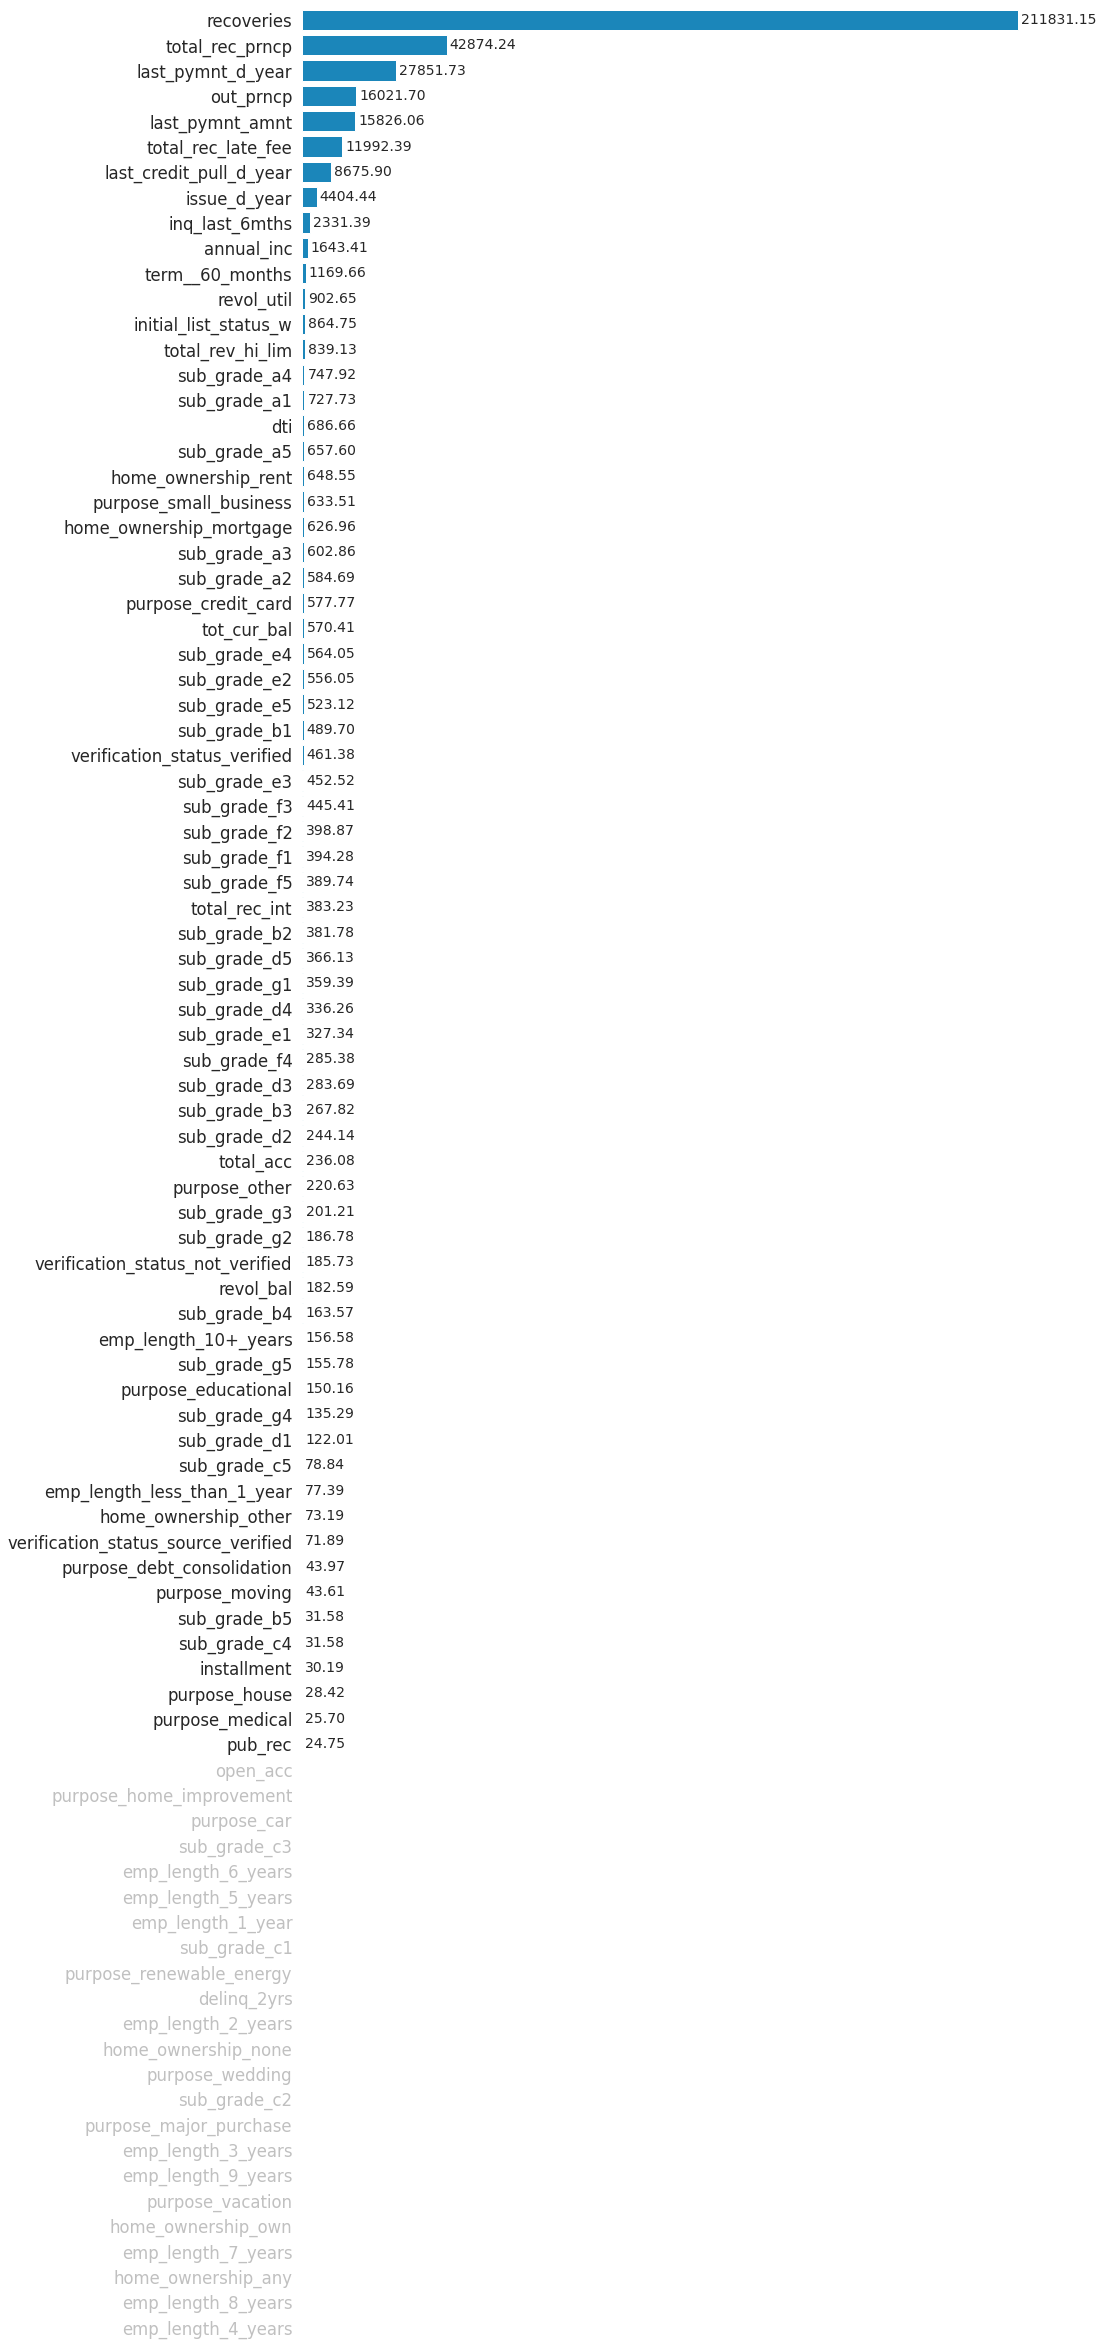

In [143]:
# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_encode.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,40))

sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)

plt.show()

### Oversampling with SMOTE

Based on the SMOTE paper, we have to do feature selection first, then do the oversampling. So, I will re-SMOTE again after doing the feature selection.

In [144]:
smote = SMOTE(random_state=1)

X_train_smote_filter, y_train_smote_filter = smote.fit_resample(X_train_filter, y_train_encode)

X_train_smote_filter_df = pd.DataFrame(X_train_smote_filter, columns=selected_feature)
y_train_smote_filter_df = pd.DataFrame(y_train_smote_filter, columns=['target'])

data_smote_filter = pd.concat([X_train_smote_filter_df, y_train_smote_filter_df], axis=1)

## Default Parameter

### Parameter List

For now, I will use the default parameter

In [145]:
model_list = {
    'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote_filter.copy()
y_train_model = y_train_smote_filter.copy()

X_test_model = X_test_filter.copy()
y_test_model = y_test_encode.copy()

### CatBoost

In [146]:
# model_list['CatBoost'].fit(X_train_model, y_train_model)
# y_pred = model_list['CatBoost'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.974     0.827     0.894     17196
           1      0.976     0.997     0.986    122690

    accuracy                          0.976    139886
   macro avg      0.975     0.912     0.940    139886
weighted avg      0.976     0.976     0.975    139886

```



### XGBoost

In [147]:
# model_list['XGBoost'].fit(X_train_model, y_train_model)
# y_pred = model_list['XGBoost'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.739     0.870     0.799     17196
           1      0.981     0.957     0.969    122690

    accuracy                          0.946    139886
   macro avg      0.860     0.913     0.884    139886
weighted avg      0.952     0.946     0.948    139886

```



### LightGBM

In [148]:
# model_list['LightGBM'].fit(X_train_model, y_train_model)
# y_pred = model_list['LightGBM'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.971     0.807     0.882     17196
           1      0.974     0.997     0.985    122690

    accuracy                          0.973    139886
   macro avg      0.973     0.902     0.933    139886
weighted avg      0.973     0.973     0.972    139886

```



## Hyperparameter Tuning

I will use Optuna for hyperparameter tuning. However, I will only tune for the XGBoost and LightGBM. Again, that's because the limited resources, like this:


```
CatBoost is using more CPU RAM (10.5GiB) than the limit (3GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(139888) > ResourceQuota(0)
```


### XGBoost

#### Optimize F1 Score (Negative Class)

In [149]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [150]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

[I 2022-05-27 06:56:41,595] A new study created in memory with name: no-name-5838e5d3-5891-47bb-afc0-89c947cbd56b
[I 2022-05-27 06:57:09,513] Trial 0 finished with value: 0.844519966015293 and parameters: {'booster': 'gbtree', 'lambda': 1.5939060566019415e-07, 'alpha': 0.20348061057794883, 'subsample': 0.6724059530465123, 'colsample_bytree': 0.4802008445680249, 'max_depth': 7, 'min_child_weight': 4, 'eta': 9.323675816079719e-06, 'gamma': 0.0036907444896969043, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.844519966015293.
[I 2022-05-27 06:57:30,277] Trial 1 finished with value: 0.7454476810036884 and parameters: {'booster': 'gbtree', 'lambda': 0.18944640885690134, 'alpha': 0.06414662547192586, 'subsample': 0.7553102025281493, 'colsample_bytree': 0.3250277929321973, 'max_depth': 7, 'min_child_weight': 2, 'eta': 9.642845198819074e-05, 'gamma': 1.2049189325823292e-08, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.844519966015293.
[I 2022-05-27 06:57:37,067] Trial

Number of finished trials:  26
Best trial:
  Value: 0.8464970457011938
  Params: 
    booster: gbtree
    lambda: 6.171397856597613e-07
    alpha: 0.9571835226056887
    subsample: 0.3599091112169733
    colsample_bytree: 0.6330624957220083
    max_depth: 7
    min_child_weight: 4
    eta: 3.4193020504978026e-06
    gamma: 0.0024134624915679425
    grow_policy: lossguide


In [151]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

XGBClassifier(alpha=0.9571835226056887, colsample_bytree=0.6330624957220083,
              eta=3.4193020504978026e-06, gamma=0.0024134624915679425,
              grow_policy='lossguide', lambda=6.171397856597613e-07,
              max_depth=7, min_child_weight=4, random_state=1,
              subsample=0.3599091112169733)

In [152]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.949     0.815     0.877     17196
           1      0.975     0.994     0.984    122690

    accuracy                          0.972    139886
   macro avg      0.962     0.904     0.930    139886
weighted avg      0.971     0.972     0.971    139886





```
XGBClassifier(alpha=0.9571835226056887, colsample_bytree=0.6330624957220083,
              eta=3.4193020504978026e-06, gamma=0.0024134624915679425,
              grow_policy='lossguide', lambda=6.171397856597613e-07,
              max_depth=7, min_child_weight=4, random_state=1,
              subsample=0.3599091112169733)
```





```
              precision    recall  f1-score   support

           0      0.949     0.815     0.877     17196
           1      0.975     0.994     0.984    122690

    accuracy                          0.972    139886
   macro avg      0.962     0.904     0.930    139886
weighted avg      0.971     0.972     0.971    139886

```



#### Optimize Accuracy

In [173]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [175]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

[I 2022-05-27 07:16:52,217] A new study created in memory with name: no-name-26d4a33e-7ad7-4468-8085-a70bef523379
[I 2022-05-27 07:17:12,824] Trial 0 finished with value: 0.8782508614157243 and parameters: {'booster': 'gbtree', 'lambda': 0.0045987279438659484, 'alpha': 1.1162059027187803e-06, 'subsample': 0.8840201577555118, 'colsample_bytree': 0.2206166274147897, 'max_depth': 3, 'min_child_weight': 4, 'eta': 1.3474796884585722e-06, 'gamma': 7.08660168649489e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8782508614157243.
[I 2022-05-27 07:18:03,696] Trial 1 finished with value: 0.9692678323777933 and parameters: {'booster': 'dart', 'lambda': 0.0007544304471174805, 'alpha': 3.930994594797208e-06, 'subsample': 0.8991865673208024, 'colsample_bytree': 0.7359354011258648, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.1657581255475923, 'gamma': 3.202088460371648e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.00305613862

Number of finished trials:  19
Best trial:
  Value: 0.9701185250847119
  Params: 
    booster: dart
    lambda: 2.9645585559415822e-06
    alpha: 0.2612396608617231
    subsample: 0.9888281813607334
    colsample_bytree: 0.7570329910229706
    max_depth: 9
    min_child_weight: 2
    eta: 0.007678660632142428
    gamma: 0.0012508900824239751
    grow_policy: depthwise
    sample_type: weighted
    normalize_type: tree
    rate_drop: 1.6914458905182456e-08
    skip_drop: 3.437250046108705e-06


In [176]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

XGBClassifier(alpha=0.2612396608617231, booster='dart',
              colsample_bytree=0.7570329910229706, eta=0.007678660632142428,
              gamma=0.0012508900824239751, grow_policy='depthwise',
              lambda=2.9645585559415822e-06, max_depth=9, min_child_weight=2,
              normalize_type='tree', random_state=1,
              rate_drop=1.6914458905182456e-08, sample_type='weighted',
              skip_drop=3.437250046108705e-06, subsample=0.9888281813607334)

In [177]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.967     0.816     0.885     17196
           1      0.975     0.996     0.985    122690

    accuracy                          0.974    139886
   macro avg      0.971     0.906     0.935    139886
weighted avg      0.974     0.974     0.973    139886





```
XGBClassifier(alpha=0.2612396608617231, booster='dart',
              colsample_bytree=0.7570329910229706, eta=0.007678660632142428,
              gamma=0.0012508900824239751, grow_policy='depthwise',
              lambda=2.9645585559415822e-06, max_depth=9, min_child_weight=2,
              normalize_type='tree', random_state=1,
              rate_drop=1.6914458905182456e-08, sample_type='weighted',
              skip_drop=3.437250046108705e-06, subsample=0.9888281813607334)
```





```
              precision    recall  f1-score   support

           0      0.967     0.816     0.885     17196
           1      0.975     0.996     0.985    122690

    accuracy                          0.974    139886
   macro avg      0.971     0.906     0.935    139886
weighted avg      0.974     0.974     0.973    139886

```



#### Optimize ROC-AUC

In [178]:
# def objective(trial):
#   dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
#   dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

#   param = {
#     "verbosity": 0,
#     "objective": "binary:logistic",
#     # use exact for small dataset.
#     "tree_method": "exact",
#     # defines booster, gblinear for linear functions.
#     "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
#     # L2 regularization weight.
#     "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # L1 regularization weight.
#     "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     # sampling ratio for training data.
#     "subsample": trial.suggest_float("subsample", 0.2, 1.0),
#     # sampling according to each tree.
#     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
#   }

#   if param["booster"] in ["gbtree", "dart"]:
#     # maximum depth of the tree, signifies complexity of the tree.
#     param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
#     # minimum child weight, larger the term more conservative the tree.
#     param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
#     param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
#     # defines how selective algorithm is.
#     param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
#     param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

#   if param["booster"] == "dart":
#     param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
#     param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
#     param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
#     param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

#   bst = xgb.train(param, dtrain)
#   preds = bst.predict(dvalid)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   objective_value = roc_auc_score(y_test_model, pred_labels)
#   return objective_value

In [179]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

[I 2022-05-27 07:42:13,049] A new study created in memory with name: no-name-73ca6364-7c36-43be-bba3-2ddba3700188
[I 2022-05-27 07:42:56,811] Trial 0 finished with value: 0.8318755396185809 and parameters: {'booster': 'gbtree', 'lambda': 0.12550518415003648, 'alpha': 0.027761219259623396, 'subsample': 0.6873093188657391, 'colsample_bytree': 0.28861950957542803, 'max_depth': 9, 'min_child_weight': 4, 'eta': 1.105814403826096e-05, 'gamma': 0.00561091881624209, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.8318755396185809.
[I 2022-05-27 07:43:16,541] Trial 1 finished with value: 0.8968714099882886 and parameters: {'booster': 'dart', 'lambda': 2.3173840211212283e-08, 'alpha': 2.147055520209958e-07, 'subsample': 0.3163905810304895, 'colsample_bytree': 0.5325511416723947, 'max_depth': 5, 'min_child_weight': 6, 'eta': 3.715380890415475e-06, 'gamma': 6.771698004338686e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.1008674131561

Number of finished trials:  23
Best trial:
  Value: 0.916119680483424
  Params: 
    booster: dart
    lambda: 9.233723508967246e-08
    alpha: 4.012827822700326e-05
    subsample: 0.35386879337685173
    colsample_bytree: 0.813617189061496
    max_depth: 9
    min_child_weight: 5
    eta: 6.079027285401592e-08
    gamma: 7.616424995406574e-05
    grow_policy: lossguide
    sample_type: uniform
    normalize_type: tree
    rate_drop: 0.018155655075728628
    skip_drop: 8.435203794199875e-06


In [180]:
# model = XGBClassifier(random_state=1)
# model.set_params(**trial.params)

XGBClassifier(alpha=4.012827822700326e-05, booster='dart',
              colsample_bytree=0.813617189061496, eta=6.079027285401592e-08,
              gamma=7.616424995406574e-05, grow_policy='lossguide',
              lambda=9.233723508967246e-08, max_depth=9, min_child_weight=5,
              normalize_type='tree', random_state=1,
              rate_drop=0.018155655075728628, sample_type='uniform',
              skip_drop=8.435203794199875e-06, subsample=0.35386879337685173)

In [181]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.950     0.818     0.879     17196
           1      0.975     0.994     0.984    122690

    accuracy                          0.972    139886
   macro avg      0.963     0.906     0.932    139886
weighted avg      0.972     0.972     0.971    139886





```
XGBClassifier(alpha=4.012827822700326e-05, booster='dart',
              colsample_bytree=0.813617189061496, eta=6.079027285401592e-08,
              gamma=7.616424995406574e-05, grow_policy='lossguide',
              lambda=9.233723508967246e-08, max_depth=9, min_child_weight=5,
              normalize_type='tree', random_state=1,
              rate_drop=0.018155655075728628, sample_type='uniform',
              skip_drop=8.435203794199875e-06, subsample=0.35386879337685173)
```





```
              precision    recall  f1-score   support

           0      0.950     0.818     0.879     17196
           1      0.975     0.994     0.984    122690

    accuracy                          0.972    139886
   macro avg      0.963     0.906     0.932    139886
weighted avg      0.972     0.972     0.971    139886

```



### LightGBM

#### Optimize F1 Score (Negative Class)

In [182]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [184]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

[I 2022-05-27 08:14:48,311] A new study created in memory with name: no-name-69ae8f1f-8721-493e-bcad-dd50a0f3b642
[I 2022-05-27 08:15:19,545] Trial 0 finished with value: 0.8868167404477098 and parameters: {'lambda_l1': 9.033570089770299e-06, 'lambda_l2': 9.758068707758472e-08, 'num_leaves': 167, 'feature_fraction': 0.7332961060897556, 'bagging_fraction': 0.48898704691819805, 'bagging_freq': 2, 'min_child_samples': 14}. Best is trial 0 with value: 0.8868167404477098.
[I 2022-05-27 08:16:02,537] Trial 1 finished with value: 0.8883307694722632 and parameters: {'lambda_l1': 3.895712173408872e-05, 'lambda_l2': 2.446541913157512e-08, 'num_leaves': 235, 'feature_fraction': 0.8509057133516087, 'bagging_fraction': 0.7315477123598342, 'bagging_freq': 4, 'min_child_samples': 67}. Best is trial 1 with value: 0.8883307694722632.
[I 2022-05-27 08:16:37,951] Trial 2 finished with value: 0.8878782136314826 and parameters: {'lambda_l1': 1.255937851605164, 'lambda_l2': 0.0085992711735243, 'num_leaves':

Number of finished trials:  18
Best trial:
  Value: 0.8907308771155725
  Params: 
    lambda_l1: 0.043895786543856924
    lambda_l2: 0.0008364909185092112
    num_leaves: 197
    feature_fraction: 0.5595221670680012
    bagging_fraction: 0.984106954298282
    bagging_freq: 1
    min_child_samples: 52


In [185]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

LGBMClassifier(bagging_fraction=0.984106954298282, bagging_freq=1,
               feature_fraction=0.5595221670680012,
               lambda_l1=0.043895786543856924, lambda_l2=0.0008364909185092112,
               min_child_samples=52, num_leaves=197, random_state=1)

In [186]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.974     0.820     0.890     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.975     0.908     0.938    139886
weighted avg      0.975     0.975     0.974    139886





```
LGBMClassifier(bagging_fraction=0.984106954298282, bagging_freq=1,
               feature_fraction=0.5595221670680012,
               lambda_l1=0.043895786543856924, lambda_l2=0.0008364909185092112,
               min_child_samples=52, num_leaves=197, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.974     0.820     0.890     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.975     0.908     0.938    139886
weighted avg      0.975     0.975     0.974    139886

```



#### Optimize Accuracy

In [187]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [188]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

[I 2022-05-27 08:27:26,891] A new study created in memory with name: no-name-bf3c0e3f-d16d-4226-a826-16ec045fc548
[I 2022-05-27 08:28:27,920] Trial 0 finished with value: 0.974078892812719 and parameters: {'lambda_l1': 0.11181566477790594, 'lambda_l2': 0.01029176585306952, 'num_leaves': 210, 'feature_fraction': 0.8882468124724016, 'bagging_fraction': 0.5370706620052462, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 0 with value: 0.974078892812719.
[I 2022-05-27 08:28:47,045] Trial 1 finished with value: 0.9724847375720229 and parameters: {'lambda_l1': 7.071078435659622, 'lambda_l2': 7.843146884498301, 'num_leaves': 28, 'feature_fraction': 0.5852088356959162, 'bagging_fraction': 0.621220417036933, 'bagging_freq': 5, 'min_child_samples': 75}. Best is trial 0 with value: 0.974078892812719.
[I 2022-05-27 08:29:32,670] Trial 2 finished with value: 0.9747222738515648 and parameters: {'lambda_l1': 6.36189606438415e-08, 'lambda_l2': 9.979143517891602e-08, 'num_leaves': 123, 'featur

Number of finished trials:  18
Best trial:
  Value: 0.9750797077620348
  Params: 
    lambda_l1: 5.263413771883288e-07
    lambda_l2: 0.16728644123546632
    num_leaves: 133
    feature_fraction: 0.6526979834129858
    bagging_fraction: 0.8743255537844937
    bagging_freq: 2
    min_child_samples: 56


In [189]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

LGBMClassifier(bagging_fraction=0.8743255537844937, bagging_freq=2,
               feature_fraction=0.6526979834129858,
               lambda_l1=5.263413771883288e-07, lambda_l2=0.16728644123546632,
               min_child_samples=56, num_leaves=133, random_state=1)

In [190]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.972     0.819     0.889     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.974     0.908     0.938    139886
weighted avg      0.975     0.975     0.974    139886





```
LGBMClassifier(bagging_fraction=0.8743255537844937, bagging_freq=2,
               feature_fraction=0.6526979834129858,
               lambda_l1=5.263413771883288e-07, lambda_l2=0.16728644123546632,
               min_child_samples=56, num_leaves=133, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.972     0.819     0.889     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.974     0.908     0.938    139886
weighted avg      0.975     0.975     0.974    139886

```



#### Optimize ROC-AUC

In [192]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   objective_value = roc_auc_score(y_test_model, pred_labels)
#   return objective_value

In [193]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

[I 2022-05-27 08:43:26,507] A new study created in memory with name: no-name-b60f2492-f9b4-4858-bfe8-098f778905c2
[I 2022-05-27 08:43:52,376] Trial 0 finished with value: 0.9056429450343298 and parameters: {'lambda_l1': 1.1883471620991994e-08, 'lambda_l2': 0.006571095224872184, 'num_leaves': 193, 'feature_fraction': 0.41962653523245647, 'bagging_fraction': 0.5066680873303626, 'bagging_freq': 4, 'min_child_samples': 49}. Best is trial 0 with value: 0.9056429450343298.
[I 2022-05-27 08:44:33,996] Trial 1 finished with value: 0.9091854270832878 and parameters: {'lambda_l1': 8.744782033090587e-08, 'lambda_l2': 1.1067991296426491, 'num_leaves': 175, 'feature_fraction': 0.861354673464829, 'bagging_fraction': 0.7770550444511194, 'bagging_freq': 6, 'min_child_samples': 37}. Best is trial 1 with value: 0.9091854270832878.
[I 2022-05-27 08:44:54,412] Trial 2 finished with value: 0.9016748692388017 and parameters: {'lambda_l1': 2.510769013527529, 'lambda_l2': 1.2379925811254617, 'num_leaves': 8, 

Number of finished trials:  18
Best trial:
  Value: 0.9101317175077688
  Params: 
    lambda_l1: 0.005336480972440771
    lambda_l2: 1.5862670678259485e-05
    num_leaves: 247
    feature_fraction: 0.7573279081558375
    bagging_fraction: 0.6519443336491246
    bagging_freq: 2
    min_child_samples: 8


In [194]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

LGBMClassifier(bagging_fraction=0.6519443336491246, bagging_freq=2,
               feature_fraction=0.7573279081558375,
               lambda_l1=0.005336480972440771, lambda_l2=1.5862670678259485e-05,
               min_child_samples=8, num_leaves=247, random_state=1)

In [195]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.966     0.823     0.889     17196
           1      0.976     0.996     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.971     0.909     0.937    139886
weighted avg      0.974     0.975     0.974    139886





```
LGBMClassifier(bagging_fraction=0.6519443336491246, bagging_freq=2,
               feature_fraction=0.7573279081558375,
               lambda_l1=0.005336480972440771, lambda_l2=1.5862670678259485e-05,
               min_child_samples=8, num_leaves=247, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.966     0.823     0.889     17196
           1      0.976     0.996     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.971     0.909     0.937    139886
weighted avg      0.974     0.975     0.974    139886

```



# Reference and Further Reading

- LendingClub. "What do the different Note statuses mean?" ([source](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-))
- Corporate Finance Institute. "Variance Inflation Factor (VIF)" ([source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/))
- Analytics Vidhya. "What is Multicollinearity? Here’s Everything You Need to Know" ([source](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/))
- ResidentMario. "missingno documentation" ([source](https://github.com/ResidentMario/missingno))
- stochazesthai. "Fisher Transformation" ([source](https://stats.stackexchange.com/questions/155429/how-to-transform-negative-values-to-logarithms))
- GeeksforGeeks. "atanh() function in C++ STL" ([source](https://www.geeksforgeeks.org/atanh-function-in-c-stl/))
- Atul Sharma. "Skewness & Kurtosis Simplified" ([source](https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85))
- BrownMath. "Measures of Shape: Skewness and Kurtosis" ([source](https://brownmath.com/stat/shape.htm))
- Scikit-learn Documentation. "6.3. Preprocessing Data" ([source](https://scikit-learn.org/stable/modules/preprocessing.html))